<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/deepnet_MACCSkeys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACCS Key Feature Based DeepNet Classification Modelling

## Introduction

MACCS key is an improvisation on 166 bit and 960 bit keyset developed by MDL products for substructure search. Descriptors are created combining atom properties, bond properties and atomic neighborhoods as well as other customized descriptors(Durant et al., 2002).

## Data loading and Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install deepchem
import deepchem as dc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.0 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


## Primary dataset

Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL database(ID:ChEMBL22).

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head()

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df['classLabel']=df['IC50'].apply(lambda x: 1 if x<=1000 else 0)
df.head()

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df_selected= df[['Smiles', 'classLabel']]
df_selected

,Smiles,classLabel
0,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1
1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,1
2,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,0
3,Cc1ccc2c(N)c3c(nc2c1)CCCC3,1
4,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,1
...,...,...
4072,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,1
4073,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],0
4074,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],0
4075,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],1


## Feature Generation -- MACCS Keys

In [ ]:
!pip install rdkit

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
dataset_file = 'inhibitor.csv'
task = ['classLabel']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
  dataset=dataset, frac_train=0.6, frac_valid=0.2, frac_test=0.2, random_state=42
)
print(len(train_dataset))
3
print(len(valid_dataset))
1
print(len(test_dataset))

2446
815
816


In [ ]:
train_dataset.X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
train_dataset.y

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

## Classification modeling with deepnet architectures: ANN, CNN, LSTM, GRU, BiLSTM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.X)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset.y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes
num_classes = 2

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and store results
results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],
           'ROC-AUC': [], 'Cohen\'s Kappa': [], 'MCC': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on recall
    early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred_prob = model.predict(X_valid_lstm)
        y_test_pred_prob = model.predict(X_test_lstm)
    else:
        y_valid_pred_prob = model.predict(X_valid)
        y_test_pred_prob = model.predict(X_test)

    y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

    # Calculate evaluation metrics
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Print the confusion matrix as text
    print_confusion_matrix(confusion, model_name)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation Accuracy:", valid_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Cohen's Kappa Score:", cohen_kappa)
    print("MCC Score:", mcc)
    print()

    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.7854 - accuracy: 0.5349

90/90 [==============================] - 10s 16ms/step - loss: 0.7854 - accuracy: 0.5349 - val_loss: 0.6411 - val_accuracy: 0.6569
Epoch 2/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6780 - accuracy: 0.6079

90/90 [==============================] - 1s 9ms/step - loss: 0.6758 - accuracy: 0.6102 - val_loss: 0.6214 - val_accuracy: 0.6765
Epoch 3/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6321 - accuracy: 0.6435

90/90 [==============================] - 1s 9ms/step - loss: 0.6343 - accuracy: 0.6477 - val_loss: 0.5946 - val_accuracy: 0.6993
Epoch 4/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6083 - accuracy: 0.6603

90/90 [==============================] - 1s 8ms/step - loss: 0.6106 - accuracy: 0.6597 - val_loss: 0.5711 - val_accuracy: 0.7124
Epoch 5/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5776 - accuracy: 0.7016

90/90 [==============================] - 1s 7ms/step - loss: 0.5765 - accuracy: 0.7028 - val_loss: 0.5561 - val_accuracy: 0.7271
Epoch 6/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7260

90/90 [==============================] - 1s 10ms/step - loss: 0.5420 - accuracy: 0.7259 - val_loss: 0.5397 - val_accuracy: 0.7402
Epoch 7/100
87/90 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7385

90/90 [==============================] - 1s 12ms/step - loss: 0.5430 - accuracy: 0.7364 - val_loss: 0.5228 - val_accuracy: 0.7435
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.7504

90/90 [==============================] - 1s 16ms/step - loss: 0.5070 - accuracy: 0.7504 - val_loss: 0.5113 - val_accuracy: 0.7598
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.5011 - accuracy: 0.7619

90/90 [==============================] - 1s 15ms/step - loss: 0.5006 - accuracy: 0.7624 - val_loss: 0.5074 - val_accuracy: 0.7614
Epoch 10/100
87/90 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7676

90/90 [==============================] - 2s 18ms/step - loss: 0.4910 - accuracy: 0.7669 - val_loss: 0.5004 - val_accuracy: 0.7876
Epoch 11/100
87/90 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.7848

90/90 [==============================] - 1s 13ms/step - loss: 0.4819 - accuracy: 0.7844 - val_loss: 0.4950 - val_accuracy: 0.7908
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.7816

90/90 [==============================] - 1s 10ms/step - loss: 0.4565 - accuracy: 0.7816 - val_loss: 0.4891 - val_accuracy: 0.7941
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.4537 - accuracy: 0.7967

90/90 [==============================] - 1s 8ms/step - loss: 0.4537 - accuracy: 0.7967 - val_loss: 0.4839 - val_accuracy: 0.7925
Epoch 14/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4506 - accuracy: 0.7956

90/90 [==============================] - 1s 9ms/step - loss: 0.4473 - accuracy: 0.7964 - val_loss: 0.4809 - val_accuracy: 0.7908
Epoch 15/100
87/90 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.8114

90/90 [==============================] - 1s 9ms/step - loss: 0.4266 - accuracy: 0.8104 - val_loss: 0.4716 - val_accuracy: 0.7958
Epoch 16/100
87/90 [============================>.] - ETA: 0s - loss: 0.4241 - accuracy: 0.8172

90/90 [==============================] - 1s 10ms/step - loss: 0.4204 - accuracy: 0.8191 - val_loss: 0.4707 - val_accuracy: 0.8072
Epoch 17/100
87/90 [============================>.] - ETA: 0s - loss: 0.4136 - accuracy: 0.8208

90/90 [==============================] - 1s 10ms/step - loss: 0.4137 - accuracy: 0.8195 - val_loss: 0.4733 - val_accuracy: 0.8007
Epoch 18/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4116 - accuracy: 0.8096

90/90 [==============================] - 1s 9ms/step - loss: 0.4086 - accuracy: 0.8111 - val_loss: 0.4752 - val_accuracy: 0.7974
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8220

90/90 [==============================] - 1s 8ms/step - loss: 0.4106 - accuracy: 0.8219 - val_loss: 0.4730 - val_accuracy: 0.8072
Epoch 20/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3987 - accuracy: 0.8336

90/90 [==============================] - 1s 7ms/step - loss: 0.4020 - accuracy: 0.8307 - val_loss: 0.4758 - val_accuracy: 0.8023
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.3900 - accuracy: 0.8279

90/90 [==============================] - 1s 9ms/step - loss: 0.3900 - accuracy: 0.8279 - val_loss: 0.4582 - val_accuracy: 0.8121
Epoch 22/100
88/90 [============================>.] - ETA: 0s - loss: 0.3789 - accuracy: 0.8345

90/90 [==============================] - 1s 8ms/step - loss: 0.3772 - accuracy: 0.8346 - val_loss: 0.4642 - val_accuracy: 0.8088
Epoch 23/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3730 - accuracy: 0.8268

90/90 [==============================] - 1s 9ms/step - loss: 0.3717 - accuracy: 0.8286 - val_loss: 0.4683 - val_accuracy: 0.8039
Epoch 24/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3666 - accuracy: 0.8401

90/90 [==============================] - 1s 10ms/step - loss: 0.3655 - accuracy: 0.8395 - val_loss: 0.4712 - val_accuracy: 0.8105
Epoch 25/100
88/90 [============================>.] - ETA: 0s - loss: 0.3717 - accuracy: 0.8434

90/90 [==============================] - 1s 12ms/step - loss: 0.3735 - accuracy: 0.8433 - val_loss: 0.4638 - val_accuracy: 0.8154
Epoch 26/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3501 - accuracy: 0.8482

90/90 [==============================] - 1s 10ms/step - loss: 0.3517 - accuracy: 0.8479 - val_loss: 0.4734 - val_accuracy: 0.8219
Epoch 27/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3397 - accuracy: 0.8522

90/90 [==============================] - 1s 10ms/step - loss: 0.3376 - accuracy: 0.8545 - val_loss: 0.4928 - val_accuracy: 0.8252
Epoch 28/100
88/90 [============================>.] - ETA: 0s - loss: 0.3376 - accuracy: 0.8569

90/90 [==============================] - 1s 11ms/step - loss: 0.3366 - accuracy: 0.8573 - val_loss: 0.4836 - val_accuracy: 0.8235
Epoch 29/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3353 - accuracy: 0.8582

90/90 [==============================] - 1s 10ms/step - loss: 0.3353 - accuracy: 0.8580 - val_loss: 0.4933 - val_accuracy: 0.8268
Epoch 30/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3466 - accuracy: 0.8471

90/90 [==============================] - 1s 8ms/step - loss: 0.3513 - accuracy: 0.8468 - val_loss: 0.4655 - val_accuracy: 0.8137
Epoch 31/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3377 - accuracy: 0.8565

90/90 [==============================] - 1s 9ms/step - loss: 0.3403 - accuracy: 0.8545 - val_loss: 0.4951 - val_accuracy: 0.8268
Epoch 32/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3264 - accuracy: 0.8582

90/90 [==============================] - 1s 7ms/step - loss: 0.3288 - accuracy: 0.8584 - val_loss: 0.4925 - val_accuracy: 0.8170
Epoch 33/100
88/90 [============================>.] - ETA: 0s - loss: 0.3086 - accuracy: 0.8615

90/90 [==============================] - 1s 7ms/step - loss: 0.3084 - accuracy: 0.8626 - val_loss: 0.5211 - val_accuracy: 0.8219
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.3088 - accuracy: 0.8725

90/90 [==============================] - 1s 7ms/step - loss: 0.3084 - accuracy: 0.8728 - val_loss: 0.5215 - val_accuracy: 0.8235
Epoch 35/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3120 - accuracy: 0.8686

90/90 [==============================] - 1s 8ms/step - loss: 0.3140 - accuracy: 0.8682 - val_loss: 0.5304 - val_accuracy: 0.8252
Epoch 36/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3135 - accuracy: 0.8728

90/90 [==============================] - 1s 10ms/step - loss: 0.3119 - accuracy: 0.8728 - val_loss: 0.5201 - val_accuracy: 0.8235
Epoch 37/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3270 - accuracy: 0.8680

90/90 [==============================] - 1s 8ms/step - loss: 0.3289 - accuracy: 0.8661 - val_loss: 0.4964 - val_accuracy: 0.8121
Epoch 38/100
76/90 [========================>.....] - ETA: 0s - loss: 0.3104 - accuracy: 0.8734

90/90 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8721 - val_loss: 0.5268 - val_accuracy: 0.8268
Epoch 39/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2995 - accuracy: 0.8674

90/90 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.8679 - val_loss: 0.5318 - val_accuracy: 0.8088
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.3011 - accuracy: 0.8679

90/90 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8679 - val_loss: 0.5108 - val_accuracy: 0.8023
Epoch 41/100
88/90 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8729

90/90 [==============================] - 0s 4ms/step - loss: 0.2908 - accuracy: 0.8735 - val_loss: 0.5199 - val_accuracy: 0.8170
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.2913 - accuracy: 0.8749

90/90 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.8749 - val_loss: 0.5267 - val_accuracy: 0.8121
Epoch 43/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2784 - accuracy: 0.8830

90/90 [==============================] - 0s 4ms/step - loss: 0.2775 - accuracy: 0.8840 - val_loss: 0.5390 - val_accuracy: 0.8170
Epoch 44/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8809

90/90 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.8808 - val_loss: 0.5652 - val_accuracy: 0.8121
Epoch 45/100
75/90 [========================>.....] - ETA: 0s - loss: 0.2831 - accuracy: 0.8908

90/90 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.8889 - val_loss: 0.5516 - val_accuracy: 0.8105
Epoch 46/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2860 - accuracy: 0.8799

90/90 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8801 - val_loss: 0.5531 - val_accuracy: 0.8170
Epoch 47/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2773 - accuracy: 0.8801

90/90 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.8805 - val_loss: 0.5532 - val_accuracy: 0.8121
Epoch 48/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2649 - accuracy: 0.8861

90/90 [==============================] - 1s 6ms/step - loss: 0.2691 - accuracy: 0.8864 - val_loss: 0.5631 - val_accuracy: 0.8219
Epoch 49/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2719 - accuracy: 0.8834

90/90 [==============================] - 1s 6ms/step - loss: 0.2726 - accuracy: 0.8829 - val_loss: 0.5694 - val_accuracy: 0.8219
Epoch 50/100
80/90 [=========================>....] - ETA: 0s - loss: 0.2519 - accuracy: 0.8930

90/90 [==============================] - 1s 6ms/step - loss: 0.2536 - accuracy: 0.8917 - val_loss: 0.6152 - val_accuracy: 0.8056
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.8961

90/90 [==============================] - 1s 6ms/step - loss: 0.2465 - accuracy: 0.8962 - val_loss: 0.6125 - val_accuracy: 0.8235
Epoch 52/100
87/90 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.8858

90/90 [==============================] - 1s 6ms/step - loss: 0.2692 - accuracy: 0.8854 - val_loss: 0.5836 - val_accuracy: 0.8203
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.2588 - accuracy: 0.8899

90/90 [==============================] - 1s 11ms/step - loss: 0.2588 - accuracy: 0.8899 - val_loss: 0.6166 - val_accuracy: 0.8088
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.8901

90/90 [==============================] - 1s 12ms/step - loss: 0.2556 - accuracy: 0.8903 - val_loss: 0.5899 - val_accuracy: 0.8121
Epoch 55/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2512 - accuracy: 0.8984

90/90 [==============================] - 1s 8ms/step - loss: 0.2490 - accuracy: 0.8973 - val_loss: 0.5911 - val_accuracy: 0.8121
Epoch 56/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2462 - accuracy: 0.8908

90/90 [==============================] - 1s 7ms/step - loss: 0.2457 - accuracy: 0.8917 - val_loss: 0.6297 - val_accuracy: 0.8088
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.2561 - accuracy: 0.8936

90/90 [==============================] - 1s 8ms/step - loss: 0.2562 - accuracy: 0.8934 - val_loss: 0.6008 - val_accuracy: 0.8203
Epoch 58/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.9081

90/90 [==============================] - 1s 9ms/step - loss: 0.2313 - accuracy: 0.9085 - val_loss: 0.6146 - val_accuracy: 0.8186
Epoch 59/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2552 - accuracy: 0.9007

90/90 [==============================] - 1s 10ms/step - loss: 0.2576 - accuracy: 0.8998 - val_loss: 0.6148 - val_accuracy: 0.8170
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.2397 - accuracy: 0.9029

90/90 [==============================] - 1s 9ms/step - loss: 0.2397 - accuracy: 0.9029 - val_loss: 0.6627 - val_accuracy: 0.8203
Epoch 61/100
75/90 [========================>.....] - ETA: 0s - loss: 0.2333 - accuracy: 0.9004

90/90 [==============================] - 1s 5ms/step - loss: 0.2344 - accuracy: 0.8998 - val_loss: 0.6342 - val_accuracy: 0.8137
Epoch 62/100
88/90 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.8977

90/90 [==============================] - 1s 8ms/step - loss: 0.2439 - accuracy: 0.8980 - val_loss: 0.6146 - val_accuracy: 0.8301
Epoch 63/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9037

90/90 [==============================] - 1s 8ms/step - loss: 0.2401 - accuracy: 0.9043 - val_loss: 0.6325 - val_accuracy: 0.8154
Epoch 64/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2355 - accuracy: 0.9048

90/90 [==============================] - 1s 7ms/step - loss: 0.2360 - accuracy: 0.9033 - val_loss: 0.6232 - val_accuracy: 0.8154
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2261 - accuracy: 0.8990

90/90 [==============================] - 1s 7ms/step - loss: 0.2281 - accuracy: 0.8991 - val_loss: 0.6557 - val_accuracy: 0.8105
Epoch 66/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2159 - accuracy: 0.9137

90/90 [==============================] - 1s 7ms/step - loss: 0.2241 - accuracy: 0.9117 - val_loss: 0.6432 - val_accuracy: 0.8203
Epoch 67/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2316 - accuracy: 0.9021

90/90 [==============================] - 1s 7ms/step - loss: 0.2306 - accuracy: 0.9029 - val_loss: 0.6128 - val_accuracy: 0.8039
Epoch 68/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2137 - accuracy: 0.9125

90/90 [==============================] - 1s 8ms/step - loss: 0.2147 - accuracy: 0.9113 - val_loss: 0.6692 - val_accuracy: 0.8072
Epoch 69/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2152 - accuracy: 0.9088

90/90 [==============================] - 1s 11ms/step - loss: 0.2152 - accuracy: 0.9085 - val_loss: 0.7233 - val_accuracy: 0.8219
Epoch 70/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2310 - accuracy: 0.9125

90/90 [==============================] - 1s 6ms/step - loss: 0.2323 - accuracy: 0.9117 - val_loss: 0.6665 - val_accuracy: 0.8219
Epoch 71/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2053 - accuracy: 0.9139

90/90 [==============================] - 1s 6ms/step - loss: 0.2064 - accuracy: 0.9138 - val_loss: 0.7318 - val_accuracy: 0.8137
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.9176

90/90 [==============================] - 1s 6ms/step - loss: 0.2088 - accuracy: 0.9176 - val_loss: 0.7170 - val_accuracy: 0.8023
Epoch 73/100
88/90 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9098

90/90 [==============================] - 1s 6ms/step - loss: 0.2212 - accuracy: 0.9099 - val_loss: 0.7054 - val_accuracy: 0.8137
Epoch 74/100
87/90 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9116

90/90 [==============================] - 1s 6ms/step - loss: 0.2223 - accuracy: 0.9120 - val_loss: 0.7066 - val_accuracy: 0.8137
Epoch 75/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2171 - accuracy: 0.9127

90/90 [==============================] - 1s 6ms/step - loss: 0.2142 - accuracy: 0.9138 - val_loss: 0.7147 - val_accuracy: 0.8056
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9175

90/90 [==============================] - 0s 5ms/step - loss: 0.2120 - accuracy: 0.9176 - val_loss: 0.7140 - val_accuracy: 0.8137
Epoch 77/100
76/90 [========================>.....] - ETA: 0s - loss: 0.2015 - accuracy: 0.9108

90/90 [==============================] - 0s 4ms/step - loss: 0.1996 - accuracy: 0.9120 - val_loss: 0.7739 - val_accuracy: 0.8219
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.2068 - accuracy: 0.9084

90/90 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.9085 - val_loss: 0.7591 - val_accuracy: 0.8072
Epoch 79/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2147 - accuracy: 0.9148

90/90 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9131 - val_loss: 0.7198 - val_accuracy: 0.7974
Epoch 80/100
89/90 [============================>.] - ETA: 0s - loss: 0.1975 - accuracy: 0.9182

90/90 [==============================] - 0s 4ms/step - loss: 0.1973 - accuracy: 0.9183 - val_loss: 0.7737 - val_accuracy: 0.7990
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9105

90/90 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9103 - val_loss: 0.7185 - val_accuracy: 0.7925
Epoch 82/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1886 - accuracy: 0.9163

90/90 [==============================] - 0s 4ms/step - loss: 0.1914 - accuracy: 0.9180 - val_loss: 0.7994 - val_accuracy: 0.8088
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.1916 - accuracy: 0.9215

90/90 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 0.9215 - val_loss: 0.8192 - val_accuracy: 0.8105
Epoch 84/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1992 - accuracy: 0.9211

90/90 [==============================] - 0s 4ms/step - loss: 0.2000 - accuracy: 0.9204 - val_loss: 0.7472 - val_accuracy: 0.7958
Epoch 85/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1855 - accuracy: 0.9267

90/90 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.9236 - val_loss: 0.7689 - val_accuracy: 0.8137
Epoch 86/100
77/90 [========================>.....] - ETA: 0s - loss: 0.1856 - accuracy: 0.9229

90/90 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.9246 - val_loss: 0.7982 - val_accuracy: 0.8023
Epoch 87/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2016 - accuracy: 0.9111

90/90 [==============================] - 0s 4ms/step - loss: 0.2013 - accuracy: 0.9131 - val_loss: 0.8282 - val_accuracy: 0.8039
Epoch 88/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1973 - accuracy: 0.9189

90/90 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.9187 - val_loss: 0.8043 - val_accuracy: 0.8121
Epoch 89/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1741 - accuracy: 0.9255

90/90 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.9260 - val_loss: 0.9006 - val_accuracy: 0.8039
Epoch 90/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1854 - accuracy: 0.9205

90/90 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9190 - val_loss: 0.8852 - val_accuracy: 0.8007
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.2018 - accuracy: 0.9154

90/90 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9155 - val_loss: 0.7861 - val_accuracy: 0.8007
Epoch 92/100
76/90 [========================>.....] - ETA: 0s - loss: 0.1820 - accuracy: 0.9211

90/90 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9215 - val_loss: 0.8547 - val_accuracy: 0.8105
Epoch 93/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1831 - accuracy: 0.9217

90/90 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9236 - val_loss: 0.8475 - val_accuracy: 0.8105
Epoch 94/100
75/90 [========================>.....] - ETA: 0s - loss: 0.2035 - accuracy: 0.9162

90/90 [==============================] - 0s 4ms/step - loss: 0.1999 - accuracy: 0.9162 - val_loss: 0.7877 - val_accuracy: 0.8186
Epoch 95/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1855 - accuracy: 0.9239

90/90 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9243 - val_loss: 0.8239 - val_accuracy: 0.8088
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.1766 - accuracy: 0.9285

90/90 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9285 - val_loss: 0.8691 - val_accuracy: 0.8121
Epoch 97/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1833 - accuracy: 0.9175

90/90 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9180 - val_loss: 0.8320 - val_accuracy: 0.7974
Epoch 98/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1763 - accuracy: 0.9229

90/90 [==============================] - 0s 4ms/step - loss: 0.1794 - accuracy: 0.9218 - val_loss: 0.8324 - val_accuracy: 0.8072
Epoch 99/100
76/90 [========================>.....] - ETA: 0s - loss: 0.1733 - accuracy: 0.9317

90/90 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9320 - val_loss: 0.8649 - val_accuracy: 0.8186
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.9245

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[299  65]
[ 25 223]
Model: ANN
Validation Accuracy: 0.8022875816993464
Test Accuracy: 0.8529411764705882
Precision: 0.7743055555555556
Recall: 0.8991935483870968
F1 Score: 0.832089552238806
ROC-AUC Score: 0.8603110599078341
Cohen's Kappa Score: 0.7025660964230172
MCC Score: 0.7087863939169127

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5296

90/90 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5296 - val_loss: 0.6694 - val_accuracy: 0.5948
Epoch 2/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6834 - accuracy: 0.5640

90/90 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5657 - val_loss: 0.6750 - val_accuracy: 0.5980
Epoch 3/100
88/90 [============================>.] - ETA: 0s - loss: 0.6702 - accuracy: 0.5742

90/90 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.5731 - val_loss: 0.6469 - val_accuracy: 0.6405
Epoch 4/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6558 - accuracy: 0.6066

90/90 [==============================] - 0s 5ms/step - loss: 0.6558 - accuracy: 0.6067 - val_loss: 0.6242 - val_accuracy: 0.6307
Epoch 5/100
87/90 [============================>.] - ETA: 0s - loss: 0.6441 - accuracy: 0.6304

90/90 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6306 - val_loss: 0.6628 - val_accuracy: 0.6144
Epoch 6/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6285 - accuracy: 0.6595

90/90 [==============================] - 0s 5ms/step - loss: 0.6281 - accuracy: 0.6572 - val_loss: 0.6196 - val_accuracy: 0.6471
Epoch 7/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6079 - accuracy: 0.6768

90/90 [==============================] - 0s 5ms/step - loss: 0.6076 - accuracy: 0.6775 - val_loss: 0.6491 - val_accuracy: 0.6307
Epoch 8/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5977 - accuracy: 0.6867

90/90 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.6842 - val_loss: 0.5926 - val_accuracy: 0.6699
Epoch 9/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5808 - accuracy: 0.7035

90/90 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.7035 - val_loss: 0.5769 - val_accuracy: 0.6814
Epoch 10/100
87/90 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7119

90/90 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.7126 - val_loss: 0.5513 - val_accuracy: 0.7108
Epoch 11/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7302

90/90 [==============================] - 0s 5ms/step - loss: 0.5385 - accuracy: 0.7308 - val_loss: 0.5845 - val_accuracy: 0.7026
Epoch 12/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5117 - accuracy: 0.7448

90/90 [==============================] - 0s 5ms/step - loss: 0.5173 - accuracy: 0.7434 - val_loss: 0.5720 - val_accuracy: 0.6846
Epoch 13/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5061 - accuracy: 0.7634

90/90 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7634 - val_loss: 0.5518 - val_accuracy: 0.7124
Epoch 14/100
88/90 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.7770

90/90 [==============================] - 0s 5ms/step - loss: 0.4943 - accuracy: 0.7771 - val_loss: 0.5895 - val_accuracy: 0.6928
Epoch 15/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5018 - accuracy: 0.7696

90/90 [==============================] - 0s 5ms/step - loss: 0.5002 - accuracy: 0.7697 - val_loss: 0.5457 - val_accuracy: 0.7141
Epoch 16/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4647 - accuracy: 0.7901

90/90 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.7907 - val_loss: 0.5361 - val_accuracy: 0.7239
Epoch 17/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4578 - accuracy: 0.7923

90/90 [==============================] - 0s 5ms/step - loss: 0.4490 - accuracy: 0.7981 - val_loss: 0.5583 - val_accuracy: 0.7467
Epoch 18/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4363 - accuracy: 0.8040

90/90 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.8030 - val_loss: 0.5070 - val_accuracy: 0.7794
Epoch 19/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4409 - accuracy: 0.8159

90/90 [==============================] - 0s 5ms/step - loss: 0.4385 - accuracy: 0.8163 - val_loss: 0.5468 - val_accuracy: 0.7222
Epoch 20/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3955 - accuracy: 0.8331

90/90 [==============================] - 1s 7ms/step - loss: 0.4002 - accuracy: 0.8297 - val_loss: 0.5435 - val_accuracy: 0.7582
Epoch 21/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4050 - accuracy: 0.8278

90/90 [==============================] - 1s 8ms/step - loss: 0.4049 - accuracy: 0.8258 - val_loss: 0.5268 - val_accuracy: 0.7484
Epoch 22/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3924 - accuracy: 0.8298

90/90 [==============================] - 1s 7ms/step - loss: 0.3975 - accuracy: 0.8275 - val_loss: 0.4843 - val_accuracy: 0.7892
Epoch 23/100
87/90 [============================>.] - ETA: 0s - loss: 0.3821 - accuracy: 0.8301

90/90 [==============================] - 1s 8ms/step - loss: 0.3801 - accuracy: 0.8325 - val_loss: 0.5492 - val_accuracy: 0.7778
Epoch 24/100
87/90 [============================>.] - ETA: 0s - loss: 0.3707 - accuracy: 0.8441

90/90 [==============================] - 1s 7ms/step - loss: 0.3685 - accuracy: 0.8454 - val_loss: 0.5836 - val_accuracy: 0.7337
Epoch 25/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3530 - accuracy: 0.8543

90/90 [==============================] - 1s 8ms/step - loss: 0.3578 - accuracy: 0.8517 - val_loss: 0.5014 - val_accuracy: 0.7794
Epoch 26/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3406 - accuracy: 0.8579

90/90 [==============================] - 1s 6ms/step - loss: 0.3503 - accuracy: 0.8535 - val_loss: 0.5775 - val_accuracy: 0.7320
Epoch 27/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3864 - accuracy: 0.8336

90/90 [==============================] - 0s 5ms/step - loss: 0.3852 - accuracy: 0.8349 - val_loss: 0.5173 - val_accuracy: 0.7892
Epoch 28/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3428 - accuracy: 0.8566

90/90 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8587 - val_loss: 0.5036 - val_accuracy: 0.7925
Epoch 29/100
87/90 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8635

90/90 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.8626 - val_loss: 0.5318 - val_accuracy: 0.7745
Epoch 30/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3553 - accuracy: 0.8514

90/90 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8528 - val_loss: 0.4906 - val_accuracy: 0.7794
Epoch 31/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3150 - accuracy: 0.8765

90/90 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.8749 - val_loss: 0.5447 - val_accuracy: 0.7843
Epoch 32/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3225 - accuracy: 0.8682

90/90 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.8689 - val_loss: 0.5474 - val_accuracy: 0.7876
Epoch 33/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3033 - accuracy: 0.8801

90/90 [==============================] - 1s 6ms/step - loss: 0.2997 - accuracy: 0.8805 - val_loss: 0.5692 - val_accuracy: 0.7778
Epoch 34/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2736 - accuracy: 0.8957

90/90 [==============================] - 0s 5ms/step - loss: 0.2791 - accuracy: 0.8910 - val_loss: 0.5867 - val_accuracy: 0.7794
Epoch 35/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2987 - accuracy: 0.8728

90/90 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.8721 - val_loss: 0.5474 - val_accuracy: 0.7941
Epoch 36/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2942 - accuracy: 0.8792

90/90 [==============================] - 0s 5ms/step - loss: 0.2984 - accuracy: 0.8763 - val_loss: 0.5379 - val_accuracy: 0.7908
Epoch 37/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3154 - accuracy: 0.8650

90/90 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.8665 - val_loss: 0.5248 - val_accuracy: 0.7990
Epoch 38/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2764 - accuracy: 0.8987

90/90 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.8962 - val_loss: 0.6931 - val_accuracy: 0.7320
Epoch 39/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2593 - accuracy: 0.9018

90/90 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.8980 - val_loss: 0.5657 - val_accuracy: 0.7925
Epoch 40/100
87/90 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8840

90/90 [==============================] - 0s 5ms/step - loss: 0.2984 - accuracy: 0.8840 - val_loss: 0.6416 - val_accuracy: 0.7467
Epoch 41/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2728 - accuracy: 0.8910

90/90 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.8917 - val_loss: 0.5748 - val_accuracy: 0.7843
Epoch 42/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2532 - accuracy: 0.8996

90/90 [==============================] - 0s 5ms/step - loss: 0.2511 - accuracy: 0.9019 - val_loss: 0.5902 - val_accuracy: 0.7778
Epoch 43/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2756 - accuracy: 0.8893

90/90 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.8903 - val_loss: 0.5644 - val_accuracy: 0.7892
Epoch 44/100
88/90 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.9041

90/90 [==============================] - 0s 5ms/step - loss: 0.2445 - accuracy: 0.9043 - val_loss: 0.6375 - val_accuracy: 0.7696
Epoch 45/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2305 - accuracy: 0.9132

90/90 [==============================] - 0s 5ms/step - loss: 0.2284 - accuracy: 0.9138 - val_loss: 0.7048 - val_accuracy: 0.7745
Epoch 46/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2462 - accuracy: 0.8996

90/90 [==============================] - 0s 5ms/step - loss: 0.2469 - accuracy: 0.9001 - val_loss: 0.5718 - val_accuracy: 0.7794
Epoch 47/100
87/90 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9185

90/90 [==============================] - 1s 7ms/step - loss: 0.2234 - accuracy: 0.9169 - val_loss: 0.6650 - val_accuracy: 0.7794
Epoch 48/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2374 - accuracy: 0.9078

90/90 [==============================] - 1s 8ms/step - loss: 0.2515 - accuracy: 0.9040 - val_loss: 0.8762 - val_accuracy: 0.7222
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9041

90/90 [==============================] - 1s 7ms/step - loss: 0.2336 - accuracy: 0.9043 - val_loss: 0.6752 - val_accuracy: 0.7778
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9082

90/90 [==============================] - 1s 7ms/step - loss: 0.2488 - accuracy: 0.9082 - val_loss: 0.6615 - val_accuracy: 0.7712
Epoch 51/100
88/90 [============================>.] - ETA: 0s - loss: 0.2173 - accuracy: 0.9169

90/90 [==============================] - 1s 7ms/step - loss: 0.2157 - accuracy: 0.9180 - val_loss: 0.7335 - val_accuracy: 0.7565
Epoch 52/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2187 - accuracy: 0.9182

90/90 [==============================] - 1s 8ms/step - loss: 0.2174 - accuracy: 0.9187 - val_loss: 0.6342 - val_accuracy: 0.7647
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9155

90/90 [==============================] - 1s 7ms/step - loss: 0.2109 - accuracy: 0.9155 - val_loss: 0.6782 - val_accuracy: 0.7794
Epoch 54/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2245 - accuracy: 0.9187

90/90 [==============================] - 0s 5ms/step - loss: 0.2274 - accuracy: 0.9173 - val_loss: 0.6589 - val_accuracy: 0.7745
Epoch 55/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2328 - accuracy: 0.9136

90/90 [==============================] - 0s 5ms/step - loss: 0.2322 - accuracy: 0.9127 - val_loss: 0.6407 - val_accuracy: 0.7859
Epoch 56/100
88/90 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9251

90/90 [==============================] - 0s 5ms/step - loss: 0.2146 - accuracy: 0.9232 - val_loss: 0.6714 - val_accuracy: 0.7810
Epoch 57/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2038 - accuracy: 0.9210

90/90 [==============================] - 0s 5ms/step - loss: 0.2034 - accuracy: 0.9208 - val_loss: 0.6119 - val_accuracy: 0.7859
Epoch 58/100
87/90 [============================>.] - ETA: 0s - loss: 0.2052 - accuracy: 0.9163

90/90 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.9155 - val_loss: 0.6172 - val_accuracy: 0.7876
Epoch 59/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1920 - accuracy: 0.9248

90/90 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9232 - val_loss: 0.7431 - val_accuracy: 0.7778
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9238

90/90 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9239 - val_loss: 0.7023 - val_accuracy: 0.7794
Epoch 61/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2078 - accuracy: 0.9202

90/90 [==============================] - 0s 5ms/step - loss: 0.2083 - accuracy: 0.9190 - val_loss: 0.6879 - val_accuracy: 0.7320
Epoch 62/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2546 - accuracy: 0.8991

90/90 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.8938 - val_loss: 0.5883 - val_accuracy: 0.7876
Epoch 63/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2006 - accuracy: 0.9169

90/90 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.9180 - val_loss: 0.7142 - val_accuracy: 0.7729
Epoch 64/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1746 - accuracy: 0.9364

90/90 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9341 - val_loss: 0.6246 - val_accuracy: 0.7859
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1924 - accuracy: 0.9281

90/90 [==============================] - 0s 5ms/step - loss: 0.1944 - accuracy: 0.9278 - val_loss: 0.7431 - val_accuracy: 0.7843
Epoch 66/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2229 - accuracy: 0.9085

90/90 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9096 - val_loss: 0.6935 - val_accuracy: 0.7843
Epoch 67/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.9379

90/90 [==============================] - 0s 5ms/step - loss: 0.1793 - accuracy: 0.9366 - val_loss: 0.7513 - val_accuracy: 0.7876
Epoch 68/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1883 - accuracy: 0.9292

90/90 [==============================] - 0s 5ms/step - loss: 0.1893 - accuracy: 0.9281 - val_loss: 0.7661 - val_accuracy: 0.7876
Epoch 69/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1855 - accuracy: 0.9239

90/90 [==============================] - 0s 5ms/step - loss: 0.1857 - accuracy: 0.9229 - val_loss: 0.7873 - val_accuracy: 0.7859
Epoch 70/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1952 - accuracy: 0.9328

90/90 [==============================] - 0s 5ms/step - loss: 0.1953 - accuracy: 0.9331 - val_loss: 0.6933 - val_accuracy: 0.7810
Epoch 71/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2104 - accuracy: 0.9151

90/90 [==============================] - 0s 5ms/step - loss: 0.2092 - accuracy: 0.9148 - val_loss: 0.7449 - val_accuracy: 0.7614
Epoch 72/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1914 - accuracy: 0.9258

90/90 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.9271 - val_loss: 0.7565 - val_accuracy: 0.7712
Epoch 73/100
87/90 [============================>.] - ETA: 0s - loss: 0.1867 - accuracy: 0.9271

90/90 [==============================] - 1s 7ms/step - loss: 0.1852 - accuracy: 0.9274 - val_loss: 0.7116 - val_accuracy: 0.7859
Epoch 74/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1845 - accuracy: 0.9282

90/90 [==============================] - 1s 8ms/step - loss: 0.1838 - accuracy: 0.9281 - val_loss: 0.7223 - val_accuracy: 0.7843
Epoch 75/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1639 - accuracy: 0.9375

90/90 [==============================] - 1s 7ms/step - loss: 0.1642 - accuracy: 0.9376 - val_loss: 0.8064 - val_accuracy: 0.7827
Epoch 76/100
88/90 [============================>.] - ETA: 0s - loss: 0.1764 - accuracy: 0.9357

90/90 [==============================] - 1s 7ms/step - loss: 0.1753 - accuracy: 0.9362 - val_loss: 0.8022 - val_accuracy: 0.7810
Epoch 77/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1620 - accuracy: 0.9382

90/90 [==============================] - 1s 7ms/step - loss: 0.1605 - accuracy: 0.9383 - val_loss: 0.8252 - val_accuracy: 0.7647
Epoch 78/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1697 - accuracy: 0.9341

90/90 [==============================] - 1s 7ms/step - loss: 0.1724 - accuracy: 0.9338 - val_loss: 0.7645 - val_accuracy: 0.7876
Epoch 79/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1629 - accuracy: 0.9408

90/90 [==============================] - 1s 7ms/step - loss: 0.1645 - accuracy: 0.9404 - val_loss: 0.7731 - val_accuracy: 0.7696
Epoch 80/100
87/90 [============================>.] - ETA: 0s - loss: 0.2009 - accuracy: 0.9239

90/90 [==============================] - 1s 8ms/step - loss: 0.1997 - accuracy: 0.9250 - val_loss: 0.8295 - val_accuracy: 0.7745
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9305

90/90 [==============================] - 1s 7ms/step - loss: 0.1827 - accuracy: 0.9306 - val_loss: 0.7643 - val_accuracy: 0.7680
Epoch 82/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1690 - accuracy: 0.9349

90/90 [==============================] - 0s 5ms/step - loss: 0.1705 - accuracy: 0.9362 - val_loss: 0.7783 - val_accuracy: 0.7680
Epoch 83/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1566 - accuracy: 0.9447

90/90 [==============================] - 0s 5ms/step - loss: 0.1543 - accuracy: 0.9460 - val_loss: 0.7640 - val_accuracy: 0.7680
Epoch 84/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1565 - accuracy: 0.9455

90/90 [==============================] - 0s 5ms/step - loss: 0.1586 - accuracy: 0.9446 - val_loss: 0.8708 - val_accuracy: 0.7729
Epoch 85/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1678 - accuracy: 0.9402

90/90 [==============================] - 0s 5ms/step - loss: 0.1670 - accuracy: 0.9415 - val_loss: 0.7970 - val_accuracy: 0.7778
Epoch 86/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1763 - accuracy: 0.9324

90/90 [==============================] - 0s 5ms/step - loss: 0.1811 - accuracy: 0.9299 - val_loss: 0.8255 - val_accuracy: 0.7320
Epoch 87/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1772 - accuracy: 0.9301

90/90 [==============================] - 0s 5ms/step - loss: 0.1781 - accuracy: 0.9317 - val_loss: 0.8386 - val_accuracy: 0.7810
Epoch 88/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1629 - accuracy: 0.9394

90/90 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9373 - val_loss: 0.7823 - val_accuracy: 0.7941
Epoch 89/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1538 - accuracy: 0.9417

90/90 [==============================] - 1s 6ms/step - loss: 0.1573 - accuracy: 0.9404 - val_loss: 0.7843 - val_accuracy: 0.7663
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.1478 - accuracy: 0.9473

90/90 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9471 - val_loss: 0.7967 - val_accuracy: 0.7729
Epoch 91/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1430 - accuracy: 0.9465

90/90 [==============================] - 1s 6ms/step - loss: 0.1455 - accuracy: 0.9474 - val_loss: 0.8607 - val_accuracy: 0.7794
Epoch 92/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1450 - accuracy: 0.9432

90/90 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.9425 - val_loss: 0.9074 - val_accuracy: 0.7794
Epoch 93/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1697 - accuracy: 0.9344

90/90 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9355 - val_loss: 0.7871 - val_accuracy: 0.7827
Epoch 94/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1404 - accuracy: 0.9505

90/90 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9474 - val_loss: 0.8920 - val_accuracy: 0.7843
Epoch 95/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1699 - accuracy: 0.9336

90/90 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9359 - val_loss: 0.8833 - val_accuracy: 0.7843
Epoch 96/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1346 - accuracy: 0.9482

90/90 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9485 - val_loss: 0.8703 - val_accuracy: 0.7859
Epoch 97/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1341 - accuracy: 0.9522

90/90 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.9520 - val_loss: 1.0090 - val_accuracy: 0.7908
Epoch 98/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1722 - accuracy: 0.9349

90/90 [==============================] - 0s 5ms/step - loss: 0.1746 - accuracy: 0.9341 - val_loss: 0.7521 - val_accuracy: 0.7843
Epoch 99/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1509 - accuracy: 0.9480

90/90 [==============================] - 0s 5ms/step - loss: 0.1480 - accuracy: 0.9471 - val_loss: 0.9738 - val_accuracy: 0.7582
Epoch 100/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1704 - accuracy: 0.9367

20/20 [==============================] - 0s 3ms/step
Confusion Matrix - CNN:
[268  96]
[ 36 212]
Model: CNN
Validation Accuracy: 0.7777777777777778
Test Accuracy: 0.7843137254901961
Precision: 0.6883116883116883
Recall: 0.8548387096774194
F1 Score: 0.762589928057554
ROC-AUC Score: 0.7955512229705779
Cohen's Kappa Score: 0.5691611912279204
MCC Score: 0.5803996456489896

Epoch 1/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6869 - accuracy: 0.5469

90/90 [==============================] - 5s 16ms/step - loss: 0.6866 - accuracy: 0.5475 - val_loss: 0.6803 - val_accuracy: 0.5948
Epoch 2/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6802 - accuracy: 0.5699

90/90 [==============================] - 1s 10ms/step - loss: 0.6804 - accuracy: 0.5703 - val_loss: 0.6723 - val_accuracy: 0.5948
Epoch 3/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6786 - accuracy: 0.5665

90/90 [==============================] - 1s 10ms/step - loss: 0.6780 - accuracy: 0.5692 - val_loss: 0.6633 - val_accuracy: 0.5948
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.5685

90/90 [==============================] - 1s 10ms/step - loss: 0.6713 - accuracy: 0.5685 - val_loss: 0.6589 - val_accuracy: 0.6046
Epoch 5/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6666 - accuracy: 0.5735

90/90 [==============================] - 1s 11ms/step - loss: 0.6682 - accuracy: 0.5727 - val_loss: 0.6616 - val_accuracy: 0.6078
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6674 - accuracy: 0.5808

90/90 [==============================] - 1s 10ms/step - loss: 0.6675 - accuracy: 0.5808 - val_loss: 0.6597 - val_accuracy: 0.6111
Epoch 7/100
87/90 [============================>.] - ETA: 0s - loss: 0.6584 - accuracy: 0.5930

90/90 [==============================] - 1s 11ms/step - loss: 0.6585 - accuracy: 0.5924 - val_loss: 0.6525 - val_accuracy: 0.6095
Epoch 8/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6611 - accuracy: 0.5934

90/90 [==============================] - 1s 10ms/step - loss: 0.6606 - accuracy: 0.5931 - val_loss: 0.6525 - val_accuracy: 0.6078
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.6151

90/90 [==============================] - 1s 12ms/step - loss: 0.6573 - accuracy: 0.6151 - val_loss: 0.6527 - val_accuracy: 0.6307
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.6176

90/90 [==============================] - 1s 13ms/step - loss: 0.6496 - accuracy: 0.6176 - val_loss: 0.6354 - val_accuracy: 0.6389
Epoch 11/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6492 - accuracy: 0.6195

90/90 [==============================] - 1s 14ms/step - loss: 0.6488 - accuracy: 0.6193 - val_loss: 0.6381 - val_accuracy: 0.6193
Epoch 12/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6379 - accuracy: 0.6334

90/90 [==============================] - 1s 14ms/step - loss: 0.6378 - accuracy: 0.6337 - val_loss: 0.6296 - val_accuracy: 0.6373
Epoch 13/100
89/90 [============================>.] - ETA: 0s - loss: 0.6379 - accuracy: 0.6373

90/90 [==============================] - 1s 11ms/step - loss: 0.6379 - accuracy: 0.6379 - val_loss: 0.6395 - val_accuracy: 0.6356
Epoch 14/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6527 - accuracy: 0.6158

90/90 [==============================] - 1s 10ms/step - loss: 0.6551 - accuracy: 0.6127 - val_loss: 0.6298 - val_accuracy: 0.6324
Epoch 15/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6374 - accuracy: 0.6294

90/90 [==============================] - 1s 11ms/step - loss: 0.6390 - accuracy: 0.6271 - val_loss: 0.6317 - val_accuracy: 0.6275
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.6491

90/90 [==============================] - 1s 10ms/step - loss: 0.6320 - accuracy: 0.6491 - val_loss: 0.6172 - val_accuracy: 0.6487
Epoch 17/100
87/90 [============================>.] - ETA: 0s - loss: 0.6382 - accuracy: 0.6440

90/90 [==============================] - 1s 10ms/step - loss: 0.6373 - accuracy: 0.6442 - val_loss: 0.6131 - val_accuracy: 0.6601
Epoch 18/100
87/90 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.6541

90/90 [==============================] - 1s 10ms/step - loss: 0.6200 - accuracy: 0.6537 - val_loss: 0.6349 - val_accuracy: 0.6405
Epoch 19/100
88/90 [============================>.] - ETA: 0s - loss: 0.6176 - accuracy: 0.6538

90/90 [==============================] - 1s 10ms/step - loss: 0.6171 - accuracy: 0.6537 - val_loss: 0.6137 - val_accuracy: 0.6830
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.6523

90/90 [==============================] - 1s 11ms/step - loss: 0.6226 - accuracy: 0.6523 - val_loss: 0.6173 - val_accuracy: 0.6487
Epoch 21/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6099 - accuracy: 0.6625

90/90 [==============================] - 1s 10ms/step - loss: 0.6087 - accuracy: 0.6656 - val_loss: 0.6096 - val_accuracy: 0.6716
Epoch 22/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6158 - accuracy: 0.6657

90/90 [==============================] - 1s 10ms/step - loss: 0.6158 - accuracy: 0.6639 - val_loss: 0.6190 - val_accuracy: 0.6634
Epoch 23/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6041 - accuracy: 0.6654

90/90 [==============================] - 1s 10ms/step - loss: 0.6045 - accuracy: 0.6653 - val_loss: 0.6058 - val_accuracy: 0.6797
Epoch 24/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5979 - accuracy: 0.6733

90/90 [==============================] - 1s 14ms/step - loss: 0.5972 - accuracy: 0.6733 - val_loss: 0.6117 - val_accuracy: 0.6797
Epoch 25/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6004 - accuracy: 0.6770

90/90 [==============================] - 1s 13ms/step - loss: 0.6011 - accuracy: 0.6747 - val_loss: 0.6060 - val_accuracy: 0.6601
Epoch 26/100
88/90 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.6705

90/90 [==============================] - 1s 15ms/step - loss: 0.6096 - accuracy: 0.6712 - val_loss: 0.6246 - val_accuracy: 0.6667
Epoch 27/100
87/90 [============================>.] - ETA: 0s - loss: 0.6106 - accuracy: 0.6616

90/90 [==============================] - 1s 12ms/step - loss: 0.6108 - accuracy: 0.6628 - val_loss: 0.6300 - val_accuracy: 0.6471
Epoch 28/100
88/90 [============================>.] - ETA: 0s - loss: 0.6128 - accuracy: 0.6765

90/90 [==============================] - 1s 10ms/step - loss: 0.6113 - accuracy: 0.6779 - val_loss: 0.6060 - val_accuracy: 0.6618
Epoch 29/100
87/90 [============================>.] - ETA: 0s - loss: 0.6018 - accuracy: 0.6685

90/90 [==============================] - 1s 10ms/step - loss: 0.6005 - accuracy: 0.6698 - val_loss: 0.6009 - val_accuracy: 0.6340
Epoch 30/100
88/90 [============================>.] - ETA: 0s - loss: 0.5830 - accuracy: 0.6776

90/90 [==============================] - 1s 10ms/step - loss: 0.5837 - accuracy: 0.6768 - val_loss: 0.6329 - val_accuracy: 0.6667
Epoch 31/100
87/90 [============================>.] - ETA: 0s - loss: 0.5978 - accuracy: 0.6717

90/90 [==============================] - 1s 11ms/step - loss: 0.5978 - accuracy: 0.6726 - val_loss: 0.6114 - val_accuracy: 0.6601
Epoch 32/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5857 - accuracy: 0.6754

90/90 [==============================] - 1s 10ms/step - loss: 0.5833 - accuracy: 0.6758 - val_loss: 0.6012 - val_accuracy: 0.6928
Epoch 33/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5779 - accuracy: 0.6897

90/90 [==============================] - 1s 10ms/step - loss: 0.5827 - accuracy: 0.6866 - val_loss: 0.5924 - val_accuracy: 0.6961
Epoch 34/100
87/90 [============================>.] - ETA: 0s - loss: 0.5826 - accuracy: 0.6871

90/90 [==============================] - 1s 10ms/step - loss: 0.5849 - accuracy: 0.6866 - val_loss: 0.5862 - val_accuracy: 0.6928
Epoch 35/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5780 - accuracy: 0.6967

90/90 [==============================] - 1s 10ms/step - loss: 0.5748 - accuracy: 0.6989 - val_loss: 0.5921 - val_accuracy: 0.6814
Epoch 36/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5769 - accuracy: 0.6915

90/90 [==============================] - 1s 10ms/step - loss: 0.5732 - accuracy: 0.6961 - val_loss: 0.6044 - val_accuracy: 0.6748
Epoch 37/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5880 - accuracy: 0.6812

90/90 [==============================] - 1s 10ms/step - loss: 0.5875 - accuracy: 0.6800 - val_loss: 0.5780 - val_accuracy: 0.7026
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.6972

90/90 [==============================] - 1s 12ms/step - loss: 0.5720 - accuracy: 0.6972 - val_loss: 0.5664 - val_accuracy: 0.6977
Epoch 39/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5655 - accuracy: 0.6959

90/90 [==============================] - 1s 13ms/step - loss: 0.5659 - accuracy: 0.6972 - val_loss: 0.5777 - val_accuracy: 0.6928
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.5661 - accuracy: 0.7024

90/90 [==============================] - 1s 14ms/step - loss: 0.5653 - accuracy: 0.7031 - val_loss: 0.5675 - val_accuracy: 0.7206
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.5522 - accuracy: 0.7080

90/90 [==============================] - 1s 14ms/step - loss: 0.5522 - accuracy: 0.7080 - val_loss: 0.5881 - val_accuracy: 0.6895
Epoch 42/100
87/90 [============================>.] - ETA: 0s - loss: 0.5654 - accuracy: 0.7004

90/90 [==============================] - 1s 12ms/step - loss: 0.5664 - accuracy: 0.6989 - val_loss: 0.5709 - val_accuracy: 0.6928
Epoch 43/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5608 - accuracy: 0.7017

90/90 [==============================] - 1s 10ms/step - loss: 0.5634 - accuracy: 0.7010 - val_loss: 0.5853 - val_accuracy: 0.6993
Epoch 44/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.7162

90/90 [==============================] - 1s 10ms/step - loss: 0.5435 - accuracy: 0.7157 - val_loss: 0.5717 - val_accuracy: 0.7075
Epoch 45/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5275 - accuracy: 0.7386

90/90 [==============================] - 1s 10ms/step - loss: 0.5254 - accuracy: 0.7399 - val_loss: 0.5735 - val_accuracy: 0.7010
Epoch 46/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7327

90/90 [==============================] - 1s 10ms/step - loss: 0.5360 - accuracy: 0.7322 - val_loss: 0.5603 - val_accuracy: 0.7222
Epoch 47/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7287

90/90 [==============================] - 1s 10ms/step - loss: 0.5412 - accuracy: 0.7287 - val_loss: 0.5790 - val_accuracy: 0.7059
Epoch 48/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7206

90/90 [==============================] - 1s 10ms/step - loss: 0.5393 - accuracy: 0.7185 - val_loss: 0.5803 - val_accuracy: 0.6993
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.7245

90/90 [==============================] - 1s 10ms/step - loss: 0.5371 - accuracy: 0.7245 - val_loss: 0.5642 - val_accuracy: 0.7255
Epoch 50/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7362

90/90 [==============================] - 1s 10ms/step - loss: 0.5297 - accuracy: 0.7340 - val_loss: 0.6231 - val_accuracy: 0.6912
Epoch 51/100
87/90 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.7432

90/90 [==============================] - 1s 10ms/step - loss: 0.5109 - accuracy: 0.7445 - val_loss: 0.5665 - val_accuracy: 0.7222
Epoch 52/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5051 - accuracy: 0.7555

90/90 [==============================] - 1s 10ms/step - loss: 0.5034 - accuracy: 0.7539 - val_loss: 0.5727 - val_accuracy: 0.7288
Epoch 53/100
87/90 [============================>.] - ETA: 0s - loss: 0.5149 - accuracy: 0.7464

90/90 [==============================] - 1s 13ms/step - loss: 0.5160 - accuracy: 0.7452 - val_loss: 0.5537 - val_accuracy: 0.7059
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.7570

90/90 [==============================] - 1s 13ms/step - loss: 0.5053 - accuracy: 0.7567 - val_loss: 0.5627 - val_accuracy: 0.7173
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.5114 - accuracy: 0.7515

90/90 [==============================] - 1s 14ms/step - loss: 0.5114 - accuracy: 0.7515 - val_loss: 0.5299 - val_accuracy: 0.7500
Epoch 56/100
88/90 [============================>.] - ETA: 0s - loss: 0.5150 - accuracy: 0.7507

90/90 [==============================] - 1s 13ms/step - loss: 0.5156 - accuracy: 0.7504 - val_loss: 0.5390 - val_accuracy: 0.7435
Epoch 57/100
87/90 [============================>.] - ETA: 0s - loss: 0.5053 - accuracy: 0.7665

90/90 [==============================] - 1s 11ms/step - loss: 0.5059 - accuracy: 0.7659 - val_loss: 0.5566 - val_accuracy: 0.7435
Epoch 58/100
87/90 [============================>.] - ETA: 0s - loss: 0.4878 - accuracy: 0.7629

90/90 [==============================] - 1s 10ms/step - loss: 0.4886 - accuracy: 0.7617 - val_loss: 0.5883 - val_accuracy: 0.7206
Epoch 59/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4949 - accuracy: 0.7603

90/90 [==============================] - 1s 10ms/step - loss: 0.4967 - accuracy: 0.7578 - val_loss: 0.5758 - val_accuracy: 0.7435
Epoch 60/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7346

90/90 [==============================] - 1s 11ms/step - loss: 0.5246 - accuracy: 0.7347 - val_loss: 0.5438 - val_accuracy: 0.7516
Epoch 61/100
87/90 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.7705

90/90 [==============================] - 1s 10ms/step - loss: 0.4819 - accuracy: 0.7687 - val_loss: 0.5438 - val_accuracy: 0.7435
Epoch 62/100
87/90 [============================>.] - ETA: 0s - loss: 0.4858 - accuracy: 0.7762

90/90 [==============================] - 1s 11ms/step - loss: 0.4848 - accuracy: 0.7767 - val_loss: 0.5523 - val_accuracy: 0.7549
Epoch 63/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4673 - accuracy: 0.7846

90/90 [==============================] - 1s 10ms/step - loss: 0.4719 - accuracy: 0.7823 - val_loss: 0.5241 - val_accuracy: 0.7696
Epoch 64/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4540 - accuracy: 0.7904

90/90 [==============================] - 1s 10ms/step - loss: 0.4554 - accuracy: 0.7918 - val_loss: 0.5151 - val_accuracy: 0.7549
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5473 - accuracy: 0.7257

90/90 [==============================] - 1s 10ms/step - loss: 0.5460 - accuracy: 0.7273 - val_loss: 0.5284 - val_accuracy: 0.7484
Epoch 66/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4719 - accuracy: 0.7831

90/90 [==============================] - 1s 10ms/step - loss: 0.4754 - accuracy: 0.7788 - val_loss: 0.5335 - val_accuracy: 0.7533
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.7855

90/90 [==============================] - 1s 11ms/step - loss: 0.4650 - accuracy: 0.7855 - val_loss: 0.5518 - val_accuracy: 0.7549
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.7893

90/90 [==============================] - 1s 14ms/step - loss: 0.4544 - accuracy: 0.7893 - val_loss: 0.5355 - val_accuracy: 0.7614
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.8093

90/90 [==============================] - 1s 13ms/step - loss: 0.4364 - accuracy: 0.8093 - val_loss: 0.5611 - val_accuracy: 0.7582
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.4385 - accuracy: 0.8048

90/90 [==============================] - 1s 14ms/step - loss: 0.4383 - accuracy: 0.8051 - val_loss: 0.5628 - val_accuracy: 0.7369
Epoch 71/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4428 - accuracy: 0.7993

90/90 [==============================] - 1s 12ms/step - loss: 0.4453 - accuracy: 0.7967 - val_loss: 0.5417 - val_accuracy: 0.7435
Epoch 72/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4489 - accuracy: 0.7994

90/90 [==============================] - 1s 10ms/step - loss: 0.4526 - accuracy: 0.7967 - val_loss: 0.5398 - val_accuracy: 0.7647
Epoch 73/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4419 - accuracy: 0.7993

90/90 [==============================] - 1s 10ms/step - loss: 0.4442 - accuracy: 0.7985 - val_loss: 0.5476 - val_accuracy: 0.7402
Epoch 74/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4137 - accuracy: 0.8092

90/90 [==============================] - 1s 10ms/step - loss: 0.4128 - accuracy: 0.8097 - val_loss: 0.5310 - val_accuracy: 0.7451
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8177

90/90 [==============================] - 1s 10ms/step - loss: 0.4080 - accuracy: 0.8177 - val_loss: 0.6076 - val_accuracy: 0.7320
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.4413 - accuracy: 0.8104

90/90 [==============================] - 1s 10ms/step - loss: 0.4414 - accuracy: 0.8104 - val_loss: 0.5516 - val_accuracy: 0.7418
Epoch 77/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4077 - accuracy: 0.8195

90/90 [==============================] - 1s 10ms/step - loss: 0.4066 - accuracy: 0.8209 - val_loss: 0.5670 - val_accuracy: 0.7614
Epoch 78/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4037 - accuracy: 0.8212

90/90 [==============================] - 1s 10ms/step - loss: 0.4020 - accuracy: 0.8219 - val_loss: 0.5455 - val_accuracy: 0.7663
Epoch 79/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4096 - accuracy: 0.8132

90/90 [==============================] - 1s 10ms/step - loss: 0.4081 - accuracy: 0.8132 - val_loss: 0.5493 - val_accuracy: 0.7647
Epoch 80/100
87/90 [============================>.] - ETA: 0s - loss: 0.3957 - accuracy: 0.8233

90/90 [==============================] - 1s 10ms/step - loss: 0.3972 - accuracy: 0.8226 - val_loss: 0.5834 - val_accuracy: 0.7680
Epoch 81/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4186 - accuracy: 0.8007

90/90 [==============================] - 1s 10ms/step - loss: 0.4171 - accuracy: 0.8009 - val_loss: 0.5495 - val_accuracy: 0.7484
Epoch 82/100
87/90 [============================>.] - ETA: 0s - loss: 0.3965 - accuracy: 0.8279

90/90 [==============================] - 1s 12ms/step - loss: 0.3960 - accuracy: 0.8283 - val_loss: 0.5392 - val_accuracy: 0.7663
Epoch 83/100
88/90 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8576

90/90 [==============================] - 1s 14ms/step - loss: 0.3524 - accuracy: 0.8570 - val_loss: 0.5310 - val_accuracy: 0.7876
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8399

90/90 [==============================] - 1s 14ms/step - loss: 0.3825 - accuracy: 0.8391 - val_loss: 0.5453 - val_accuracy: 0.7745
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.3760 - accuracy: 0.8438

90/90 [==============================] - 1s 14ms/step - loss: 0.3755 - accuracy: 0.8440 - val_loss: 0.5405 - val_accuracy: 0.7810
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.3776 - accuracy: 0.8444

90/90 [==============================] - 1s 12ms/step - loss: 0.3776 - accuracy: 0.8444 - val_loss: 0.5804 - val_accuracy: 0.7565
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.3597 - accuracy: 0.8529

90/90 [==============================] - 1s 15ms/step - loss: 0.3595 - accuracy: 0.8531 - val_loss: 0.5705 - val_accuracy: 0.7565
Epoch 88/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3991 - accuracy: 0.8294

90/90 [==============================] - 1s 10ms/step - loss: 0.4035 - accuracy: 0.8265 - val_loss: 0.5780 - val_accuracy: 0.7271
Epoch 89/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3947 - accuracy: 0.8272

90/90 [==============================] - 1s 10ms/step - loss: 0.3992 - accuracy: 0.8237 - val_loss: 0.5407 - val_accuracy: 0.7794
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8591

90/90 [==============================] - 1s 10ms/step - loss: 0.3456 - accuracy: 0.8591 - val_loss: 0.5941 - val_accuracy: 0.7337
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8535

90/90 [==============================] - 1s 10ms/step - loss: 0.3535 - accuracy: 0.8535 - val_loss: 0.5678 - val_accuracy: 0.7549
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.8473

90/90 [==============================] - 1s 10ms/step - loss: 0.3553 - accuracy: 0.8475 - val_loss: 0.5802 - val_accuracy: 0.7745
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8486

90/90 [==============================] - 1s 10ms/step - loss: 0.3510 - accuracy: 0.8486 - val_loss: 0.5837 - val_accuracy: 0.7647
Epoch 94/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3281 - accuracy: 0.8643

90/90 [==============================] - 1s 11ms/step - loss: 0.3310 - accuracy: 0.8612 - val_loss: 0.5796 - val_accuracy: 0.7729
Epoch 95/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3150 - accuracy: 0.8687

90/90 [==============================] - 1s 10ms/step - loss: 0.3184 - accuracy: 0.8675 - val_loss: 0.6099 - val_accuracy: 0.7386
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8486

90/90 [==============================] - 1s 12ms/step - loss: 0.3537 - accuracy: 0.8486 - val_loss: 0.5874 - val_accuracy: 0.7778
Epoch 97/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3319 - accuracy: 0.8637

90/90 [==============================] - 1s 14ms/step - loss: 0.3291 - accuracy: 0.8647 - val_loss: 0.6099 - val_accuracy: 0.7843
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.8619

90/90 [==============================] - 1s 14ms/step - loss: 0.3354 - accuracy: 0.8619 - val_loss: 0.6032 - val_accuracy: 0.7778
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.8637

90/90 [==============================] - 1s 14ms/step - loss: 0.3158 - accuracy: 0.8637 - val_loss: 0.5870 - val_accuracy: 0.7680
Epoch 100/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3364 - accuracy: 0.8665

20/20 [==============================] - 0s 5ms/step
Confusion Matrix - LSTM:
[297  67]
[ 65 183]
Model: LSTM
Validation Accuracy: 0.7696078431372549
Test Accuracy: 0.7843137254901961
Precision: 0.732
Recall: 0.7379032258064516
F1 Score: 0.7349397590361445
ROC-AUC Score: 0.7769186458702587
Cohen's Kappa Score: 0.553126521219631
MCC Score: 0.5531392003862734

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5521

90/90 [==============================] - 4s 16ms/step - loss: 0.6833 - accuracy: 0.5521 - val_loss: 0.6795 - val_accuracy: 0.5948
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.5573

90/90 [==============================] - 1s 10ms/step - loss: 0.6825 - accuracy: 0.5573 - val_loss: 0.6704 - val_accuracy: 0.5948
Epoch 3/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6792 - accuracy: 0.5618

90/90 [==============================] - 1s 10ms/step - loss: 0.6801 - accuracy: 0.5615 - val_loss: 0.6649 - val_accuracy: 0.5948
Epoch 4/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6772 - accuracy: 0.5665

90/90 [==============================] - 1s 9ms/step - loss: 0.6769 - accuracy: 0.5661 - val_loss: 0.6560 - val_accuracy: 0.5980
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.5625

90/90 [==============================] - 1s 11ms/step - loss: 0.6722 - accuracy: 0.5622 - val_loss: 0.6467 - val_accuracy: 0.6111
Epoch 6/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6687 - accuracy: 0.5763

90/90 [==============================] - 1s 13ms/step - loss: 0.6692 - accuracy: 0.5727 - val_loss: 0.6543 - val_accuracy: 0.6209
Epoch 7/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6629 - accuracy: 0.5825

90/90 [==============================] - 1s 13ms/step - loss: 0.6632 - accuracy: 0.5850 - val_loss: 0.6659 - val_accuracy: 0.6062
Epoch 8/100
88/90 [============================>.] - ETA: 0s - loss: 0.6624 - accuracy: 0.5948

90/90 [==============================] - 1s 13ms/step - loss: 0.6627 - accuracy: 0.5948 - val_loss: 0.6536 - val_accuracy: 0.6013
Epoch 9/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6663 - accuracy: 0.5908

90/90 [==============================] - 1s 12ms/step - loss: 0.6663 - accuracy: 0.5934 - val_loss: 0.6599 - val_accuracy: 0.6307
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.6039

90/90 [==============================] - 1s 10ms/step - loss: 0.6635 - accuracy: 0.6039 - val_loss: 0.6446 - val_accuracy: 0.6013
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.5990

90/90 [==============================] - 1s 10ms/step - loss: 0.6617 - accuracy: 0.5990 - val_loss: 0.6467 - val_accuracy: 0.5997
Epoch 12/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6587 - accuracy: 0.6108

90/90 [==============================] - 1s 10ms/step - loss: 0.6591 - accuracy: 0.6099 - val_loss: 0.6478 - val_accuracy: 0.6160
Epoch 13/100
89/90 [============================>.] - ETA: 0s - loss: 0.6542 - accuracy: 0.6134

90/90 [==============================] - 1s 10ms/step - loss: 0.6543 - accuracy: 0.6130 - val_loss: 0.6815 - val_accuracy: 0.5000
Epoch 14/100
87/90 [============================>.] - ETA: 0s - loss: 0.6684 - accuracy: 0.5844

90/90 [==============================] - 1s 10ms/step - loss: 0.6678 - accuracy: 0.5832 - val_loss: 0.6552 - val_accuracy: 0.5817
Epoch 15/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6548 - accuracy: 0.6018

90/90 [==============================] - 1s 10ms/step - loss: 0.6579 - accuracy: 0.6015 - val_loss: 0.6556 - val_accuracy: 0.6144
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.6569 - accuracy: 0.6067

90/90 [==============================] - 1s 10ms/step - loss: 0.6572 - accuracy: 0.6060 - val_loss: 0.6335 - val_accuracy: 0.6193
Epoch 17/100
89/90 [============================>.] - ETA: 0s - loss: 0.6485 - accuracy: 0.6025

90/90 [==============================] - 1s 10ms/step - loss: 0.6487 - accuracy: 0.6025 - val_loss: 0.6403 - val_accuracy: 0.6242
Epoch 18/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6432 - accuracy: 0.6137

90/90 [==============================] - 1s 10ms/step - loss: 0.6440 - accuracy: 0.6151 - val_loss: 0.6273 - val_accuracy: 0.6340
Epoch 19/100
88/90 [============================>.] - ETA: 0s - loss: 0.6344 - accuracy: 0.6357

90/90 [==============================] - 1s 10ms/step - loss: 0.6353 - accuracy: 0.6355 - val_loss: 0.6244 - val_accuracy: 0.6389
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.6318 - accuracy: 0.6264

90/90 [==============================] - 1s 10ms/step - loss: 0.6322 - accuracy: 0.6260 - val_loss: 0.6289 - val_accuracy: 0.6405
Epoch 21/100
88/90 [============================>.] - ETA: 0s - loss: 0.6289 - accuracy: 0.6374

90/90 [==============================] - 1s 12ms/step - loss: 0.6281 - accuracy: 0.6386 - val_loss: 0.6128 - val_accuracy: 0.6405
Epoch 22/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6200 - accuracy: 0.6544

90/90 [==============================] - 1s 13ms/step - loss: 0.6203 - accuracy: 0.6540 - val_loss: 0.6168 - val_accuracy: 0.6275
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6236 - accuracy: 0.6477

90/90 [==============================] - 1s 13ms/step - loss: 0.6236 - accuracy: 0.6477 - val_loss: 0.6363 - val_accuracy: 0.6291
Epoch 24/100
87/90 [============================>.] - ETA: 0s - loss: 0.6220 - accuracy: 0.6300

90/90 [==============================] - 1s 13ms/step - loss: 0.6212 - accuracy: 0.6334 - val_loss: 0.6094 - val_accuracy: 0.6503
Epoch 25/100
89/90 [============================>.] - ETA: 0s - loss: 0.6108 - accuracy: 0.6510

90/90 [==============================] - 1s 10ms/step - loss: 0.6108 - accuracy: 0.6509 - val_loss: 0.6027 - val_accuracy: 0.6634
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.6078 - accuracy: 0.6608

90/90 [==============================] - 1s 10ms/step - loss: 0.6077 - accuracy: 0.6611 - val_loss: 0.6082 - val_accuracy: 0.6438
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.6642

90/90 [==============================] - 1s 10ms/step - loss: 0.6044 - accuracy: 0.6642 - val_loss: 0.6115 - val_accuracy: 0.6601
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.6642

90/90 [==============================] - 1s 10ms/step - loss: 0.6004 - accuracy: 0.6642 - val_loss: 0.6018 - val_accuracy: 0.6716
Epoch 29/100
89/90 [============================>.] - ETA: 0s - loss: 0.5907 - accuracy: 0.6728

90/90 [==============================] - 1s 10ms/step - loss: 0.5905 - accuracy: 0.6726 - val_loss: 0.6099 - val_accuracy: 0.6552
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.5934 - accuracy: 0.6664

90/90 [==============================] - 1s 10ms/step - loss: 0.5941 - accuracy: 0.6663 - val_loss: 0.6212 - val_accuracy: 0.6503
Epoch 31/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5946 - accuracy: 0.6635

90/90 [==============================] - 1s 10ms/step - loss: 0.5937 - accuracy: 0.6639 - val_loss: 0.6097 - val_accuracy: 0.6520
Epoch 32/100
88/90 [============================>.] - ETA: 0s - loss: 0.6079 - accuracy: 0.6548

90/90 [==============================] - 1s 11ms/step - loss: 0.6075 - accuracy: 0.6558 - val_loss: 0.6137 - val_accuracy: 0.6618
Epoch 33/100
88/90 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.6839

90/90 [==============================] - 1s 10ms/step - loss: 0.5981 - accuracy: 0.6838 - val_loss: 0.6091 - val_accuracy: 0.6503
Epoch 34/100
87/90 [============================>.] - ETA: 0s - loss: 0.5777 - accuracy: 0.6724

90/90 [==============================] - 1s 10ms/step - loss: 0.5787 - accuracy: 0.6723 - val_loss: 0.5908 - val_accuracy: 0.6683
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.6887

90/90 [==============================] - 1s 10ms/step - loss: 0.5687 - accuracy: 0.6887 - val_loss: 0.6016 - val_accuracy: 0.6650
Epoch 36/100
88/90 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.6978

90/90 [==============================] - 1s 12ms/step - loss: 0.5564 - accuracy: 0.6972 - val_loss: 0.6189 - val_accuracy: 0.6732
Epoch 37/100
88/90 [============================>.] - ETA: 0s - loss: 0.6109 - accuracy: 0.6538

90/90 [==============================] - 1s 13ms/step - loss: 0.6130 - accuracy: 0.6516 - val_loss: 0.6080 - val_accuracy: 0.6585
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.6912

90/90 [==============================] - 1s 13ms/step - loss: 0.5729 - accuracy: 0.6912 - val_loss: 0.5943 - val_accuracy: 0.6797
Epoch 39/100
87/90 [============================>.] - ETA: 0s - loss: 0.5644 - accuracy: 0.7008

90/90 [==============================] - 1s 13ms/step - loss: 0.5644 - accuracy: 0.7021 - val_loss: 0.5954 - val_accuracy: 0.6879
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7074

90/90 [==============================] - 1s 11ms/step - loss: 0.5486 - accuracy: 0.7052 - val_loss: 0.5891 - val_accuracy: 0.6797
Epoch 41/100
88/90 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7138

90/90 [==============================] - 1s 10ms/step - loss: 0.5495 - accuracy: 0.7126 - val_loss: 0.5912 - val_accuracy: 0.6765
Epoch 42/100
87/90 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7037

90/90 [==============================] - 1s 10ms/step - loss: 0.5429 - accuracy: 0.7035 - val_loss: 0.6119 - val_accuracy: 0.6699
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.6607

90/90 [==============================] - 1s 10ms/step - loss: 0.6169 - accuracy: 0.6607 - val_loss: 0.6483 - val_accuracy: 0.6569
Epoch 44/100
87/90 [============================>.] - ETA: 0s - loss: 0.6376 - accuracy: 0.6534

90/90 [==============================] - 1s 10ms/step - loss: 0.6370 - accuracy: 0.6519 - val_loss: 0.6242 - val_accuracy: 0.6536
Epoch 45/100
89/90 [============================>.] - ETA: 0s - loss: 0.6063 - accuracy: 0.6745

90/90 [==============================] - 1s 10ms/step - loss: 0.6063 - accuracy: 0.6744 - val_loss: 0.6049 - val_accuracy: 0.6781
Epoch 46/100
88/90 [============================>.] - ETA: 0s - loss: 0.6226 - accuracy: 0.6559

90/90 [==============================] - 1s 10ms/step - loss: 0.6232 - accuracy: 0.6540 - val_loss: 0.6306 - val_accuracy: 0.6389
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.6587

90/90 [==============================] - 1s 10ms/step - loss: 0.6134 - accuracy: 0.6590 - val_loss: 0.6077 - val_accuracy: 0.6879
Epoch 48/100
87/90 [============================>.] - ETA: 0s - loss: 0.5884 - accuracy: 0.6767

90/90 [==============================] - 1s 10ms/step - loss: 0.5862 - accuracy: 0.6789 - val_loss: 0.5978 - val_accuracy: 0.6961
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.5743 - accuracy: 0.6921

90/90 [==============================] - 1s 10ms/step - loss: 0.5736 - accuracy: 0.6944 - val_loss: 0.5871 - val_accuracy: 0.7092
Epoch 50/100
88/90 [============================>.] - ETA: 0s - loss: 0.5633 - accuracy: 0.7017

90/90 [==============================] - 1s 10ms/step - loss: 0.5621 - accuracy: 0.7038 - val_loss: 0.5857 - val_accuracy: 0.7075
Epoch 51/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5484 - accuracy: 0.7242

90/90 [==============================] - 1s 11ms/step - loss: 0.5501 - accuracy: 0.7192 - val_loss: 0.5947 - val_accuracy: 0.6846
Epoch 52/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7188

90/90 [==============================] - 1s 12ms/step - loss: 0.5356 - accuracy: 0.7189 - val_loss: 0.5924 - val_accuracy: 0.6944
Epoch 53/100
87/90 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7234

90/90 [==============================] - 1s 12ms/step - loss: 0.5341 - accuracy: 0.7224 - val_loss: 0.5828 - val_accuracy: 0.6863
Epoch 54/100
87/90 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7364

90/90 [==============================] - 1s 13ms/step - loss: 0.5298 - accuracy: 0.7371 - val_loss: 0.5818 - val_accuracy: 0.7042
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.5097 - accuracy: 0.7405

90/90 [==============================] - 1s 13ms/step - loss: 0.5100 - accuracy: 0.7406 - val_loss: 0.5846 - val_accuracy: 0.6961
Epoch 56/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5022 - accuracy: 0.7525

90/90 [==============================] - 1s 10ms/step - loss: 0.5031 - accuracy: 0.7532 - val_loss: 0.5898 - val_accuracy: 0.7026
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.7496

90/90 [==============================] - 1s 10ms/step - loss: 0.5040 - accuracy: 0.7501 - val_loss: 0.6088 - val_accuracy: 0.6863
Epoch 58/100
87/90 [============================>.] - ETA: 0s - loss: 0.4951 - accuracy: 0.7460

90/90 [==============================] - 1s 10ms/step - loss: 0.4967 - accuracy: 0.7466 - val_loss: 0.5796 - val_accuracy: 0.7059
Epoch 59/100
87/90 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.7493

90/90 [==============================] - 1s 11ms/step - loss: 0.4964 - accuracy: 0.7469 - val_loss: 0.5773 - val_accuracy: 0.7190
Epoch 60/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5033 - accuracy: 0.7449

90/90 [==============================] - 1s 10ms/step - loss: 0.5000 - accuracy: 0.7483 - val_loss: 0.5668 - val_accuracy: 0.7075
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.7658

90/90 [==============================] - 1s 10ms/step - loss: 0.4845 - accuracy: 0.7655 - val_loss: 0.6089 - val_accuracy: 0.6912
Epoch 62/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4875 - accuracy: 0.7518

90/90 [==============================] - 1s 10ms/step - loss: 0.4861 - accuracy: 0.7532 - val_loss: 0.6011 - val_accuracy: 0.6961
Epoch 63/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4608 - accuracy: 0.7647

90/90 [==============================] - 1s 10ms/step - loss: 0.4617 - accuracy: 0.7634 - val_loss: 0.5932 - val_accuracy: 0.6879
Epoch 64/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4746 - accuracy: 0.7693

90/90 [==============================] - 1s 10ms/step - loss: 0.4737 - accuracy: 0.7701 - val_loss: 0.6019 - val_accuracy: 0.6977
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.7671

90/90 [==============================] - 1s 10ms/step - loss: 0.4728 - accuracy: 0.7666 - val_loss: 0.5799 - val_accuracy: 0.7108
Epoch 66/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4697 - accuracy: 0.7667

90/90 [==============================] - 1s 10ms/step - loss: 0.4665 - accuracy: 0.7687 - val_loss: 0.6199 - val_accuracy: 0.6961
Epoch 67/100
87/90 [============================>.] - ETA: 0s - loss: 0.4497 - accuracy: 0.7777

90/90 [==============================] - 1s 13ms/step - loss: 0.4516 - accuracy: 0.7778 - val_loss: 0.6175 - val_accuracy: 0.7026
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.4529 - accuracy: 0.7823

90/90 [==============================] - 1s 13ms/step - loss: 0.4529 - accuracy: 0.7823 - val_loss: 0.6609 - val_accuracy: 0.6846
Epoch 69/100
89/90 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.7781

90/90 [==============================] - 1s 13ms/step - loss: 0.4515 - accuracy: 0.7771 - val_loss: 0.6520 - val_accuracy: 0.6977
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.4610 - accuracy: 0.7736

90/90 [==============================] - 1s 13ms/step - loss: 0.4610 - accuracy: 0.7736 - val_loss: 0.5714 - val_accuracy: 0.7255
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.7834

90/90 [==============================] - 1s 11ms/step - loss: 0.4452 - accuracy: 0.7834 - val_loss: 0.5903 - val_accuracy: 0.7075
Epoch 72/100
87/90 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.7927

90/90 [==============================] - 1s 10ms/step - loss: 0.4269 - accuracy: 0.7914 - val_loss: 0.6154 - val_accuracy: 0.7255
Epoch 73/100
87/90 [============================>.] - ETA: 0s - loss: 0.4439 - accuracy: 0.7823

90/90 [==============================] - 1s 12ms/step - loss: 0.4468 - accuracy: 0.7834 - val_loss: 0.5947 - val_accuracy: 0.7124
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.7841

90/90 [==============================] - 2s 17ms/step - loss: 0.4499 - accuracy: 0.7841 - val_loss: 0.6442 - val_accuracy: 0.7173
Epoch 75/100
87/90 [============================>.] - ETA: 0s - loss: 0.4400 - accuracy: 0.7917

90/90 [==============================] - 1s 11ms/step - loss: 0.4408 - accuracy: 0.7893 - val_loss: 0.5865 - val_accuracy: 0.7157
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8069

90/90 [==============================] - 1s 10ms/step - loss: 0.4076 - accuracy: 0.8072 - val_loss: 0.6383 - val_accuracy: 0.7255
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.5943 - accuracy: 0.6584

90/90 [==============================] - 1s 10ms/step - loss: 0.5945 - accuracy: 0.6583 - val_loss: 0.6265 - val_accuracy: 0.6275
Epoch 78/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5771 - accuracy: 0.6636

90/90 [==============================] - 1s 10ms/step - loss: 0.5765 - accuracy: 0.6614 - val_loss: 0.6087 - val_accuracy: 0.6569
Epoch 79/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5465 - accuracy: 0.7028

90/90 [==============================] - 1s 10ms/step - loss: 0.5444 - accuracy: 0.7042 - val_loss: 0.6129 - val_accuracy: 0.6814
Epoch 80/100
88/90 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.7376

90/90 [==============================] - 1s 10ms/step - loss: 0.5077 - accuracy: 0.7378 - val_loss: 0.5969 - val_accuracy: 0.6846
Epoch 81/100
88/90 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.7692

90/90 [==============================] - 1s 12ms/step - loss: 0.4690 - accuracy: 0.7694 - val_loss: 0.6097 - val_accuracy: 0.7075
Epoch 82/100
88/90 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.7859

90/90 [==============================] - 1s 12ms/step - loss: 0.4311 - accuracy: 0.7862 - val_loss: 0.6239 - val_accuracy: 0.7369
Epoch 83/100
89/90 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.7999

90/90 [==============================] - 1s 12ms/step - loss: 0.4085 - accuracy: 0.7995 - val_loss: 0.6496 - val_accuracy: 0.7239
Epoch 84/100
88/90 [============================>.] - ETA: 0s - loss: 0.4023 - accuracy: 0.8054

90/90 [==============================] - 1s 13ms/step - loss: 0.4020 - accuracy: 0.8051 - val_loss: 0.6518 - val_accuracy: 0.7157
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.4041 - accuracy: 0.8058

90/90 [==============================] - 1s 13ms/step - loss: 0.4043 - accuracy: 0.8055 - val_loss: 0.6112 - val_accuracy: 0.7271
Epoch 86/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3904 - accuracy: 0.8114

90/90 [==============================] - 1s 10ms/step - loss: 0.3903 - accuracy: 0.8107 - val_loss: 0.6908 - val_accuracy: 0.7239
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.8104

90/90 [==============================] - 1s 10ms/step - loss: 0.3793 - accuracy: 0.8100 - val_loss: 0.6349 - val_accuracy: 0.7353
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.3760 - accuracy: 0.8239

90/90 [==============================] - 1s 10ms/step - loss: 0.3767 - accuracy: 0.8237 - val_loss: 0.6827 - val_accuracy: 0.7173
Epoch 89/100
87/90 [============================>.] - ETA: 0s - loss: 0.3765 - accuracy: 0.8197

90/90 [==============================] - 1s 10ms/step - loss: 0.3751 - accuracy: 0.8209 - val_loss: 0.6466 - val_accuracy: 0.7386
Epoch 90/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3563 - accuracy: 0.8325

90/90 [==============================] - 1s 10ms/step - loss: 0.3554 - accuracy: 0.8335 - val_loss: 0.6912 - val_accuracy: 0.7435
Epoch 91/100
87/90 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8261

90/90 [==============================] - 1s 10ms/step - loss: 0.3586 - accuracy: 0.8268 - val_loss: 0.7136 - val_accuracy: 0.7092
Epoch 92/100
87/90 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.8208

90/90 [==============================] - 1s 10ms/step - loss: 0.3858 - accuracy: 0.8230 - val_loss: 0.7048 - val_accuracy: 0.7255
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.3461 - accuracy: 0.8395

90/90 [==============================] - 1s 10ms/step - loss: 0.3461 - accuracy: 0.8395 - val_loss: 0.7458 - val_accuracy: 0.7418
Epoch 94/100
88/90 [============================>.] - ETA: 0s - loss: 0.3311 - accuracy: 0.8459

90/90 [==============================] - 1s 10ms/step - loss: 0.3303 - accuracy: 0.8461 - val_loss: 0.8526 - val_accuracy: 0.7337
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.3270 - accuracy: 0.8504

90/90 [==============================] - 1s 11ms/step - loss: 0.3277 - accuracy: 0.8500 - val_loss: 0.7038 - val_accuracy: 0.7484
Epoch 96/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3481 - accuracy: 0.8398

90/90 [==============================] - 1s 10ms/step - loss: 0.3527 - accuracy: 0.8384 - val_loss: 0.7123 - val_accuracy: 0.6977
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.8206

90/90 [==============================] - 1s 13ms/step - loss: 0.3721 - accuracy: 0.8209 - val_loss: 0.6729 - val_accuracy: 0.7304
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.3346 - accuracy: 0.8507

90/90 [==============================] - 1s 13ms/step - loss: 0.3346 - accuracy: 0.8507 - val_loss: 0.7324 - val_accuracy: 0.7271
Epoch 99/100
89/90 [============================>.] - ETA: 0s - loss: 0.3179 - accuracy: 0.8613

90/90 [==============================] - 1s 14ms/step - loss: 0.3178 - accuracy: 0.8612 - val_loss: 0.6867 - val_accuracy: 0.7418
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.8581

20/20 [==============================] - 0s 5ms/step
Confusion Matrix - GRU:
[276  88]
[ 48 200]
Model: GRU
Validation Accuracy: 0.7271241830065359
Test Accuracy: 0.7777777777777778
Precision: 0.6944444444444444
Recall: 0.8064516129032258
F1 Score: 0.746268656716418
ROC-AUC Score: 0.7823466855724919
Cohen's Kappa Score: 0.5505443234836702
MCC Score: 0.5554186683931093

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.5713

90/90 [==============================] - 7s 34ms/step - loss: 0.6825 - accuracy: 0.5713 - val_loss: 0.6740 - val_accuracy: 0.5948
Epoch 2/100
88/90 [============================>.] - ETA: 0s - loss: 0.6773 - accuracy: 0.5728

90/90 [==============================] - 2s 22ms/step - loss: 0.6775 - accuracy: 0.5717 - val_loss: 0.6700 - val_accuracy: 0.5948
Epoch 3/100
89/90 [============================>.] - ETA: 0s - loss: 0.6771 - accuracy: 0.5748

90/90 [==============================] - 2s 17ms/step - loss: 0.6773 - accuracy: 0.5745 - val_loss: 0.6642 - val_accuracy: 0.6046
Epoch 4/100
88/90 [============================>.] - ETA: 0s - loss: 0.6752 - accuracy: 0.5835

90/90 [==============================] - 1s 16ms/step - loss: 0.6755 - accuracy: 0.5815 - val_loss: 0.6617 - val_accuracy: 0.6258
Epoch 5/100
88/90 [============================>.] - ETA: 0s - loss: 0.6611 - accuracy: 0.5781

90/90 [==============================] - 1s 16ms/step - loss: 0.6610 - accuracy: 0.5783 - val_loss: 0.6532 - val_accuracy: 0.5964
Epoch 6/100
88/90 [============================>.] - ETA: 0s - loss: 0.6561 - accuracy: 0.5945

90/90 [==============================] - 1s 16ms/step - loss: 0.6563 - accuracy: 0.5934 - val_loss: 0.6528 - val_accuracy: 0.6389
Epoch 7/100
89/90 [============================>.] - ETA: 0s - loss: 0.6541 - accuracy: 0.5822

90/90 [==============================] - 1s 16ms/step - loss: 0.6543 - accuracy: 0.5815 - val_loss: 0.6443 - val_accuracy: 0.6193
Epoch 8/100
88/90 [============================>.] - ETA: 0s - loss: 0.6533 - accuracy: 0.5980

90/90 [==============================] - 1s 16ms/step - loss: 0.6535 - accuracy: 0.5983 - val_loss: 0.6731 - val_accuracy: 0.5915
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.6591 - accuracy: 0.5878

90/90 [==============================] - 2s 18ms/step - loss: 0.6588 - accuracy: 0.5882 - val_loss: 0.6338 - val_accuracy: 0.6307
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.6309

90/90 [==============================] - 2s 23ms/step - loss: 0.6381 - accuracy: 0.6309 - val_loss: 0.6334 - val_accuracy: 0.6405
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6367 - accuracy: 0.6442

90/90 [==============================] - 2s 22ms/step - loss: 0.6367 - accuracy: 0.6442 - val_loss: 0.6217 - val_accuracy: 0.6618
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.6176

90/90 [==============================] - 1s 16ms/step - loss: 0.6371 - accuracy: 0.6176 - val_loss: 0.6381 - val_accuracy: 0.6160
Epoch 13/100
88/90 [============================>.] - ETA: 0s - loss: 0.6262 - accuracy: 0.6286

90/90 [==============================] - 1s 16ms/step - loss: 0.6245 - accuracy: 0.6302 - val_loss: 0.6503 - val_accuracy: 0.6356
Epoch 14/100
89/90 [============================>.] - ETA: 0s - loss: 0.6711 - accuracy: 0.5685

90/90 [==============================] - 2s 17ms/step - loss: 0.6711 - accuracy: 0.5689 - val_loss: 0.6697 - val_accuracy: 0.5948
Epoch 15/100
88/90 [============================>.] - ETA: 0s - loss: 0.6581 - accuracy: 0.5788

90/90 [==============================] - 1s 16ms/step - loss: 0.6581 - accuracy: 0.5787 - val_loss: 0.6590 - val_accuracy: 0.6373
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.6415 - accuracy: 0.5885

90/90 [==============================] - 1s 16ms/step - loss: 0.6413 - accuracy: 0.5889 - val_loss: 0.6410 - val_accuracy: 0.6373
Epoch 17/100
88/90 [============================>.] - ETA: 0s - loss: 0.6289 - accuracy: 0.6339

90/90 [==============================] - 1s 16ms/step - loss: 0.6290 - accuracy: 0.6337 - val_loss: 0.6297 - val_accuracy: 0.6699
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.6477

90/90 [==============================] - 2s 20ms/step - loss: 0.6197 - accuracy: 0.6477 - val_loss: 0.6192 - val_accuracy: 0.6732
Epoch 19/100
88/90 [============================>.] - ETA: 0s - loss: 0.6106 - accuracy: 0.6612

90/90 [==============================] - 2s 23ms/step - loss: 0.6107 - accuracy: 0.6611 - val_loss: 0.6214 - val_accuracy: 0.6683
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.6149 - accuracy: 0.6573

90/90 [==============================] - 2s 21ms/step - loss: 0.6148 - accuracy: 0.6576 - val_loss: 0.6140 - val_accuracy: 0.6748
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.6632

90/90 [==============================] - 2s 17ms/step - loss: 0.6023 - accuracy: 0.6632 - val_loss: 0.6276 - val_accuracy: 0.6356
Epoch 22/100
89/90 [============================>.] - ETA: 0s - loss: 0.5910 - accuracy: 0.6699

90/90 [==============================] - 2s 17ms/step - loss: 0.5907 - accuracy: 0.6702 - val_loss: 0.6000 - val_accuracy: 0.6748
Epoch 23/100
87/90 [============================>.] - ETA: 0s - loss: 0.5914 - accuracy: 0.6764

90/90 [==============================] - 1s 17ms/step - loss: 0.5911 - accuracy: 0.6751 - val_loss: 0.6165 - val_accuracy: 0.6944
Epoch 24/100
88/90 [============================>.] - ETA: 0s - loss: 0.5781 - accuracy: 0.6868

90/90 [==============================] - 1s 16ms/step - loss: 0.5779 - accuracy: 0.6870 - val_loss: 0.6026 - val_accuracy: 0.6863
Epoch 25/100
88/90 [============================>.] - ETA: 0s - loss: 0.5732 - accuracy: 0.6911

90/90 [==============================] - 1s 16ms/step - loss: 0.5738 - accuracy: 0.6919 - val_loss: 0.6380 - val_accuracy: 0.6650
Epoch 26/100
87/90 [============================>.] - ETA: 0s - loss: 0.5772 - accuracy: 0.6832

90/90 [==============================] - 1s 16ms/step - loss: 0.5771 - accuracy: 0.6838 - val_loss: 0.5959 - val_accuracy: 0.6879
Epoch 27/100
89/90 [============================>.] - ETA: 0s - loss: 0.5687 - accuracy: 0.6970

90/90 [==============================] - 2s 21ms/step - loss: 0.5690 - accuracy: 0.6968 - val_loss: 0.5947 - val_accuracy: 0.6912
Epoch 28/100
88/90 [============================>.] - ETA: 0s - loss: 0.5647 - accuracy: 0.6942

90/90 [==============================] - 2s 24ms/step - loss: 0.5639 - accuracy: 0.6947 - val_loss: 0.5908 - val_accuracy: 0.6993
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.6993

90/90 [==============================] - 2s 21ms/step - loss: 0.5651 - accuracy: 0.6993 - val_loss: 0.6286 - val_accuracy: 0.6977
Epoch 30/100
87/90 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.6889

90/90 [==============================] - 1s 16ms/step - loss: 0.5701 - accuracy: 0.6909 - val_loss: 0.6158 - val_accuracy: 0.6699
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.6947

90/90 [==============================] - 2s 17ms/step - loss: 0.5693 - accuracy: 0.6947 - val_loss: 0.5984 - val_accuracy: 0.6781
Epoch 32/100
89/90 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7005

90/90 [==============================] - 1s 16ms/step - loss: 0.5565 - accuracy: 0.7003 - val_loss: 0.5992 - val_accuracy: 0.6977
Epoch 33/100
87/90 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7155

90/90 [==============================] - 1s 16ms/step - loss: 0.5522 - accuracy: 0.7150 - val_loss: 0.5803 - val_accuracy: 0.6830
Epoch 34/100
88/90 [============================>.] - ETA: 0s - loss: 0.5515 - accuracy: 0.7045

90/90 [==============================] - 1s 16ms/step - loss: 0.5520 - accuracy: 0.7049 - val_loss: 0.5841 - val_accuracy: 0.7059
Epoch 35/100
88/90 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7067

90/90 [==============================] - 1s 16ms/step - loss: 0.5531 - accuracy: 0.7066 - val_loss: 0.5939 - val_accuracy: 0.6895
Epoch 36/100
88/90 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7081

90/90 [==============================] - 2s 20ms/step - loss: 0.5452 - accuracy: 0.7087 - val_loss: 0.6213 - val_accuracy: 0.6699
Epoch 37/100
89/90 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.7279

90/90 [==============================] - 2s 25ms/step - loss: 0.5478 - accuracy: 0.7280 - val_loss: 0.6161 - val_accuracy: 0.6961
Epoch 38/100
87/90 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7259

90/90 [==============================] - 2s 19ms/step - loss: 0.5319 - accuracy: 0.7256 - val_loss: 0.5894 - val_accuracy: 0.7108
Epoch 39/100
88/90 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7234

90/90 [==============================] - 1s 16ms/step - loss: 0.5335 - accuracy: 0.7227 - val_loss: 0.5786 - val_accuracy: 0.7026
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.5263 - accuracy: 0.7230

90/90 [==============================] - 2s 17ms/step - loss: 0.5264 - accuracy: 0.7231 - val_loss: 0.5879 - val_accuracy: 0.7042
Epoch 41/100
88/90 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.7365

90/90 [==============================] - 1s 16ms/step - loss: 0.5248 - accuracy: 0.7350 - val_loss: 0.5738 - val_accuracy: 0.7010
Epoch 42/100
88/90 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7035

90/90 [==============================] - 1s 16ms/step - loss: 0.5535 - accuracy: 0.7035 - val_loss: 0.5947 - val_accuracy: 0.6863
Epoch 43/100
89/90 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7230

90/90 [==============================] - 2s 17ms/step - loss: 0.5383 - accuracy: 0.7227 - val_loss: 0.5756 - val_accuracy: 0.7010
Epoch 44/100
88/90 [============================>.] - ETA: 0s - loss: 0.5288 - accuracy: 0.7365

90/90 [==============================] - 1s 17ms/step - loss: 0.5296 - accuracy: 0.7361 - val_loss: 0.5866 - val_accuracy: 0.6944
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7459

90/90 [==============================] - 2s 23ms/step - loss: 0.5226 - accuracy: 0.7459 - val_loss: 0.5884 - val_accuracy: 0.7157
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.5201 - accuracy: 0.7402

90/90 [==============================] - 2s 22ms/step - loss: 0.5202 - accuracy: 0.7399 - val_loss: 0.5725 - val_accuracy: 0.7124
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7329

90/90 [==============================] - 2s 20ms/step - loss: 0.5119 - accuracy: 0.7329 - val_loss: 0.5929 - val_accuracy: 0.6863
Epoch 48/100
88/90 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.7404

90/90 [==============================] - 1s 16ms/step - loss: 0.5080 - accuracy: 0.7403 - val_loss: 0.5686 - val_accuracy: 0.7042
Epoch 49/100
89/90 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.7447

90/90 [==============================] - 1s 16ms/step - loss: 0.5012 - accuracy: 0.7448 - val_loss: 0.5710 - val_accuracy: 0.7141
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.5124 - accuracy: 0.7427

90/90 [==============================] - 1s 16ms/step - loss: 0.5124 - accuracy: 0.7427 - val_loss: 0.5760 - val_accuracy: 0.7222
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.4896 - accuracy: 0.7525

90/90 [==============================] - 1s 16ms/step - loss: 0.4895 - accuracy: 0.7525 - val_loss: 0.5851 - val_accuracy: 0.7124
Epoch 52/100
88/90 [============================>.] - ETA: 0s - loss: 0.5035 - accuracy: 0.7500

90/90 [==============================] - 2s 17ms/step - loss: 0.5040 - accuracy: 0.7504 - val_loss: 0.5797 - val_accuracy: 0.7124
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.7543

90/90 [==============================] - 1s 16ms/step - loss: 0.4856 - accuracy: 0.7553 - val_loss: 0.5602 - val_accuracy: 0.7435
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.4877 - accuracy: 0.7693

90/90 [==============================] - 2s 21ms/step - loss: 0.4878 - accuracy: 0.7694 - val_loss: 0.5871 - val_accuracy: 0.7239
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.7508

90/90 [==============================] - 2s 24ms/step - loss: 0.4985 - accuracy: 0.7508 - val_loss: 0.5779 - val_accuracy: 0.7206
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.4760 - accuracy: 0.7630

90/90 [==============================] - 2s 19ms/step - loss: 0.4766 - accuracy: 0.7624 - val_loss: 0.5876 - val_accuracy: 0.7059
Epoch 57/100
87/90 [============================>.] - ETA: 0s - loss: 0.4642 - accuracy: 0.7777

90/90 [==============================] - 1s 16ms/step - loss: 0.4686 - accuracy: 0.7736 - val_loss: 0.5990 - val_accuracy: 0.7108
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.4652 - accuracy: 0.7725

90/90 [==============================] - 2s 17ms/step - loss: 0.4652 - accuracy: 0.7725 - val_loss: 0.5935 - val_accuracy: 0.7271
Epoch 59/100
88/90 [============================>.] - ETA: 0s - loss: 0.4563 - accuracy: 0.7798

90/90 [==============================] - 2s 17ms/step - loss: 0.4561 - accuracy: 0.7795 - val_loss: 0.5860 - val_accuracy: 0.7353
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.4588 - accuracy: 0.7791

90/90 [==============================] - 1s 16ms/step - loss: 0.4585 - accuracy: 0.7795 - val_loss: 0.5974 - val_accuracy: 0.7451
Epoch 61/100
87/90 [============================>.] - ETA: 0s - loss: 0.4489 - accuracy: 0.7777

90/90 [==============================] - 1s 16ms/step - loss: 0.4526 - accuracy: 0.7736 - val_loss: 0.5780 - val_accuracy: 0.7304
Epoch 62/100
88/90 [============================>.] - ETA: 0s - loss: 0.4634 - accuracy: 0.7837

90/90 [==============================] - 1s 16ms/step - loss: 0.4629 - accuracy: 0.7830 - val_loss: 0.6141 - val_accuracy: 0.7042
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.7841

90/90 [==============================] - 2s 22ms/step - loss: 0.4526 - accuracy: 0.7841 - val_loss: 0.6047 - val_accuracy: 0.7141
Epoch 64/100
88/90 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.6463

90/90 [==============================] - 2s 24ms/step - loss: 0.6031 - accuracy: 0.6484 - val_loss: 0.6119 - val_accuracy: 0.6438
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.6912

90/90 [==============================] - 2s 18ms/step - loss: 0.5649 - accuracy: 0.6912 - val_loss: 0.5940 - val_accuracy: 0.6797
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.5189 - accuracy: 0.7213

90/90 [==============================] - 1s 16ms/step - loss: 0.5189 - accuracy: 0.7213 - val_loss: 0.5906 - val_accuracy: 0.6977
Epoch 67/100
88/90 [============================>.] - ETA: 0s - loss: 0.4977 - accuracy: 0.7450

90/90 [==============================] - 1s 16ms/step - loss: 0.4969 - accuracy: 0.7462 - val_loss: 0.5696 - val_accuracy: 0.7255
Epoch 68/100
88/90 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.7514

90/90 [==============================] - 1s 17ms/step - loss: 0.4965 - accuracy: 0.7504 - val_loss: 0.5675 - val_accuracy: 0.7026
Epoch 69/100
89/90 [============================>.] - ETA: 0s - loss: 0.4701 - accuracy: 0.7700

90/90 [==============================] - 1s 16ms/step - loss: 0.4705 - accuracy: 0.7697 - val_loss: 0.5820 - val_accuracy: 0.7141
Epoch 70/100
87/90 [============================>.] - ETA: 0s - loss: 0.4596 - accuracy: 0.7726

90/90 [==============================] - 1s 16ms/step - loss: 0.4598 - accuracy: 0.7746 - val_loss: 0.5770 - val_accuracy: 0.6944
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.7578

90/90 [==============================] - 2s 18ms/step - loss: 0.4897 - accuracy: 0.7585 - val_loss: 0.5803 - val_accuracy: 0.7173
Epoch 72/100
89/90 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.7788

90/90 [==============================] - 2s 22ms/step - loss: 0.4446 - accuracy: 0.7792 - val_loss: 0.6157 - val_accuracy: 0.7141
Epoch 73/100
88/90 [============================>.] - ETA: 0s - loss: 0.4284 - accuracy: 0.7972

90/90 [==============================] - 2s 24ms/step - loss: 0.4293 - accuracy: 0.7967 - val_loss: 0.5863 - val_accuracy: 0.7157
Epoch 74/100
88/90 [============================>.] - ETA: 0s - loss: 0.4552 - accuracy: 0.7820

90/90 [==============================] - 2s 18ms/step - loss: 0.4574 - accuracy: 0.7799 - val_loss: 0.6051 - val_accuracy: 0.7337
Epoch 75/100
88/90 [============================>.] - ETA: 0s - loss: 0.4303 - accuracy: 0.8068

90/90 [==============================] - 1s 16ms/step - loss: 0.4326 - accuracy: 0.8058 - val_loss: 0.6052 - val_accuracy: 0.7108
Epoch 76/100
87/90 [============================>.] - ETA: 0s - loss: 0.4058 - accuracy: 0.8075

90/90 [==============================] - 2s 17ms/step - loss: 0.4072 - accuracy: 0.8069 - val_loss: 0.6648 - val_accuracy: 0.7124
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.4320 - accuracy: 0.8037

90/90 [==============================] - 1s 16ms/step - loss: 0.4320 - accuracy: 0.8037 - val_loss: 0.6236 - val_accuracy: 0.7157
Epoch 78/100
87/90 [============================>.] - ETA: 0s - loss: 0.3949 - accuracy: 0.8150

90/90 [==============================] - 2s 17ms/step - loss: 0.3949 - accuracy: 0.8146 - val_loss: 0.6211 - val_accuracy: 0.7386
Epoch 79/100
87/90 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.8136

90/90 [==============================] - 1s 17ms/step - loss: 0.4052 - accuracy: 0.8121 - val_loss: 0.6140 - val_accuracy: 0.7549
Epoch 80/100
89/90 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8058

90/90 [==============================] - 2s 19ms/step - loss: 0.4200 - accuracy: 0.8055 - val_loss: 0.5724 - val_accuracy: 0.7271
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8258

90/90 [==============================] - 2s 24ms/step - loss: 0.3895 - accuracy: 0.8258 - val_loss: 0.6295 - val_accuracy: 0.7467
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8209

90/90 [==============================] - 2s 22ms/step - loss: 0.3939 - accuracy: 0.8209 - val_loss: 0.6702 - val_accuracy: 0.7288
Epoch 83/100
87/90 [============================>.] - ETA: 0s - loss: 0.3967 - accuracy: 0.8215

90/90 [==============================] - 1s 16ms/step - loss: 0.3978 - accuracy: 0.8205 - val_loss: 0.6241 - val_accuracy: 0.7288
Epoch 84/100
87/90 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8035

90/90 [==============================] - 1s 16ms/step - loss: 0.4070 - accuracy: 0.8041 - val_loss: 0.6500 - val_accuracy: 0.7533
Epoch 85/100
88/90 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8327

90/90 [==============================] - 1s 16ms/step - loss: 0.3716 - accuracy: 0.8332 - val_loss: 0.6983 - val_accuracy: 0.7255
Epoch 86/100
88/90 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8196

90/90 [==============================] - 1s 16ms/step - loss: 0.3959 - accuracy: 0.8198 - val_loss: 0.6456 - val_accuracy: 0.7516
Epoch 87/100
88/90 [============================>.] - ETA: 0s - loss: 0.3925 - accuracy: 0.8107

90/90 [==============================] - 1s 16ms/step - loss: 0.3927 - accuracy: 0.8111 - val_loss: 0.7061 - val_accuracy: 0.7010
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.3854 - accuracy: 0.8251

90/90 [==============================] - 1s 17ms/step - loss: 0.3854 - accuracy: 0.8251 - val_loss: 0.6364 - val_accuracy: 0.7451
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.3559 - accuracy: 0.8437

90/90 [==============================] - 2s 21ms/step - loss: 0.3559 - accuracy: 0.8437 - val_loss: 0.6300 - val_accuracy: 0.7500
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.8430

90/90 [==============================] - 2s 25ms/step - loss: 0.3471 - accuracy: 0.8426 - val_loss: 0.6483 - val_accuracy: 0.7565
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8458

90/90 [==============================] - 2s 21ms/step - loss: 0.3474 - accuracy: 0.8458 - val_loss: 0.7211 - val_accuracy: 0.7190
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.3968 - accuracy: 0.8185

90/90 [==============================] - 2s 17ms/step - loss: 0.3968 - accuracy: 0.8181 - val_loss: 0.6456 - val_accuracy: 0.7337
Epoch 93/100
87/90 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.8165

90/90 [==============================] - 2s 17ms/step - loss: 0.3861 - accuracy: 0.8177 - val_loss: 0.6031 - val_accuracy: 0.7745
Epoch 94/100
87/90 [============================>.] - ETA: 0s - loss: 0.3418 - accuracy: 0.8517

90/90 [==============================] - 1s 16ms/step - loss: 0.3416 - accuracy: 0.8517 - val_loss: 0.6540 - val_accuracy: 0.7582
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8539

90/90 [==============================] - 2s 17ms/step - loss: 0.3389 - accuracy: 0.8542 - val_loss: 0.6688 - val_accuracy: 0.7484
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8395

90/90 [==============================] - 2s 17ms/step - loss: 0.3545 - accuracy: 0.8395 - val_loss: 0.6428 - val_accuracy: 0.7484
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.3161 - accuracy: 0.8606

90/90 [==============================] - 1s 16ms/step - loss: 0.3162 - accuracy: 0.8605 - val_loss: 0.6725 - val_accuracy: 0.7402
Epoch 98/100
88/90 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8338

90/90 [==============================] - 2s 22ms/step - loss: 0.3758 - accuracy: 0.8349 - val_loss: 0.6729 - val_accuracy: 0.7680
Epoch 99/100
88/90 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8643

90/90 [==============================] - 2s 22ms/step - loss: 0.3127 - accuracy: 0.8633 - val_loss: 0.6587 - val_accuracy: 0.7435
Epoch 100/100
88/90 [============================>.] - ETA: 0s - loss: 0.3294 - accuracy: 0.8590

20/20 [==============================] - 0s 9ms/step
Confusion Matrix - Bi-LSTM:
[273  91]
[ 57 191]
Model: Bi-LSTM
Validation Accuracy: 0.7794117647058824
Test Accuracy: 0.7581699346405228
Precision: 0.6773049645390071
Recall: 0.7701612903225806
F1 Score: 0.7207547169811321
ROC-AUC Score: 0.7600806451612904
Cohen's Kappa Score: 0.5090412384545335
MCC Score: 0.5123102412023218



## Cross species evaluation





### Loading species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndepdendent_cleadedIC50.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

### Featurization of species datasets


In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['binary_activities']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['single-class-label']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['single-class-label']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['single-class-label']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['single-class-label']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['single-class-label']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

In [ ]:
df_ids = pd.DataFrame(dataset.ids)
df_X = pd.DataFrame(dataset.X)
df_y = pd.DataFrame(dataset.y)

# Concatenate the DataFrames horizontally
df_combined = pd.concat([df_ids, df_X, df_y], axis=1)

### Test Dataset Preparation

In [ ]:
from sklearn.model_selection import train_test_split

ids = df_combined.iloc[:, 0]
X = df_combined.iloc[:, 1:-1]
y = df_combined.iloc[:, -1]
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.15, random_state=42)

X_train, X_valid, y_train, y_valid, ids_train, ids_valid = train_test_split(X_train, y_train, ids_train, test_size=0.15/0.85, random_state=42)

# Display the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (2853, 167) (2853,)
Validation set shape: (612, 167) (612,)
Test set shape: (612, 167) (612,)


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
1749,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2053,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
538,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
438,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2685,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
949,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
1146,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
29,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0


In [ ]:
test_df = pd.concat([ids_test, X_test, y_test], axis=1)


In [ ]:
test_df

,0,0,1,2,3,4,5,6,7,8,...,158,159,160,161,162,163,164,165,166,0
1749,Clc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,1,0,0.0
2053,CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1.0
538,Cc1cccc(C[n+]2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)c1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,0.0
438,CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,1,0,1.0
2685,COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)ccc(C(CCCCCCC...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,0,0.0
949,CCCC[C@@H](O)/C=C/C=C/C(=O)O,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1.0
1146,COc1cc(C(=O)NCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)c...,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1.0
29,CCC(CC)n1cc(C(=O)C(F)(F)F)cn1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,1,0,1.0


In [ ]:
test_df = test_df.iloc[:, [0, -1]]
test_df.columns = ['cleanedmol', 'target']

In [ ]:
test_df

,cleanedmol,target
1749,Clc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1,0.0
2053,CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1,1.0
538,Cc1cccc(C[n+]2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)c1,0.0
438,CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2,1.0
2685,COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2,1.0
...,...,...
450,O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)ccc(C(CCCCCCC...,0.0
949,CCCC[C@@H](O)/C=C/C=C/C(=O)O,1.0
1146,COc1cc(C(=O)NCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)c...,1.0
29,CCC(CC)n1cc(C(=O)C(F)(F)F)cn1,1.0


In [ ]:
test_df.to_csv('inhibitor_test.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_test.csv'
task = ['target']
featurizer_func =dc.feat.MACCSKeysFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedmol', featurizer=featurizer_func)
test_dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(test_dataset)
test_dataset = transformer.transform(test_dataset)

### Cross species evaluation

Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[302  62]
[ 25 223]
Model: ANN
Accuracy: 0.8578431372549019
Precision: 0.7824561403508772
Recall: 0.8991935483870968
F1 Score: 0.8367729831144465
ROC-AUC Score: 0.9145360687699396
Cohen's Kappa Score: 0.7119392326170226
MCC Score: 0.7173426508916094

Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[92 46]
[23 47]
Model: ANN
Accuracy: 0.6682692307692307
Precision: 0.5053763440860215
Recall: 0.6714285714285714
F1 Score: 0.5766871165644173
ROC-AUC Score: 0.7048654244306418
Cohen's Kappa Score: 0.31277533039647587
MCC Score: 0.3213196037630085

Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[2517  858]
[ 737 1347]
Model: ANN
Accuracy: 0.7078219454112474
Precision: 0.6108843537414966
Recall: 0.6463531

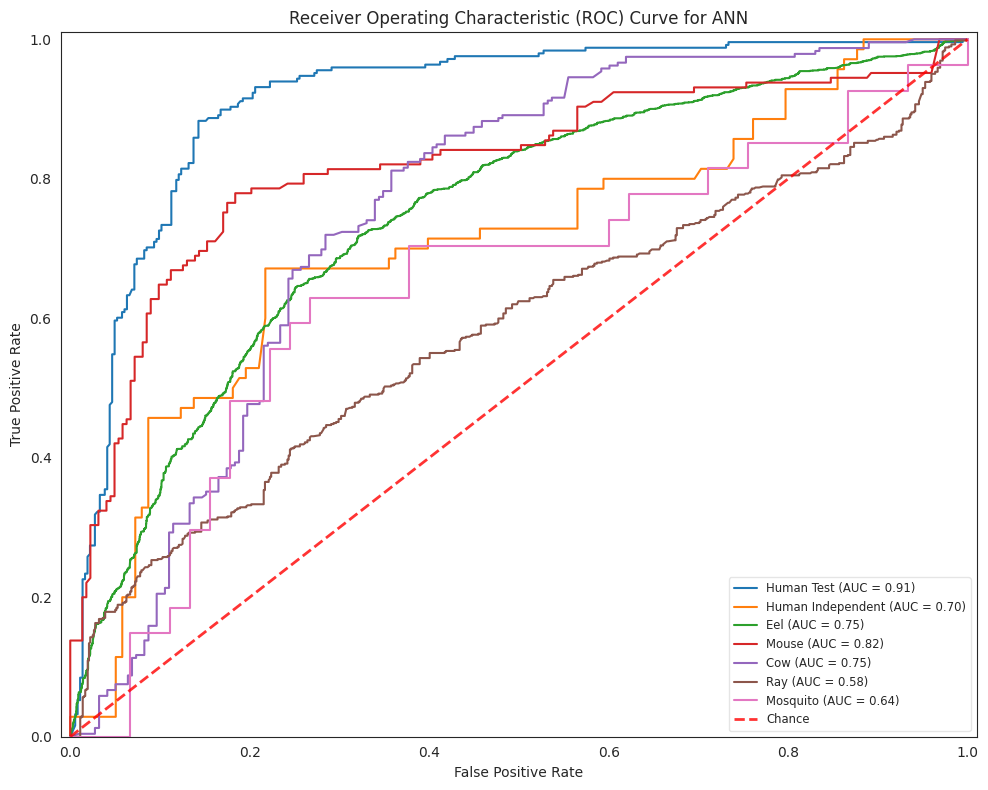

Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[265  99]
[ 37 211]
Model: CNN
Accuracy: 0.7777777777777778
Precision: 0.6806451612903226
Recall: 0.8508064516129032
F1 Score: 0.7562724014336917
ROC-AUC Score: 0.8677552286423255
Cohen's Kappa Score: 0.5566540248007841
MCC Score: 0.568384292504498

Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 18ms/step
Confusion Matrix - CNN:
[88 50]
[31 39]
Model: CNN
Accuracy: 0.6105769230769231
Precision: 0.43820224719101125
Recall: 0.5571428571428572
F1 Score: 0.4905660377358491
ROC-AUC Score: 0.6031055900621118
Cohen's Kappa Score: 0.18261207063846296
MCC Score: 0.1860640936928593

Evaluating dataset: Eel
Evaluating model: CNN
171/171 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[2207 1168]
[ 793 1291]
Model: CNN
Accuracy: 0.6407766990291263
Precision: 0.5250101667344449
Recall: 0.619481

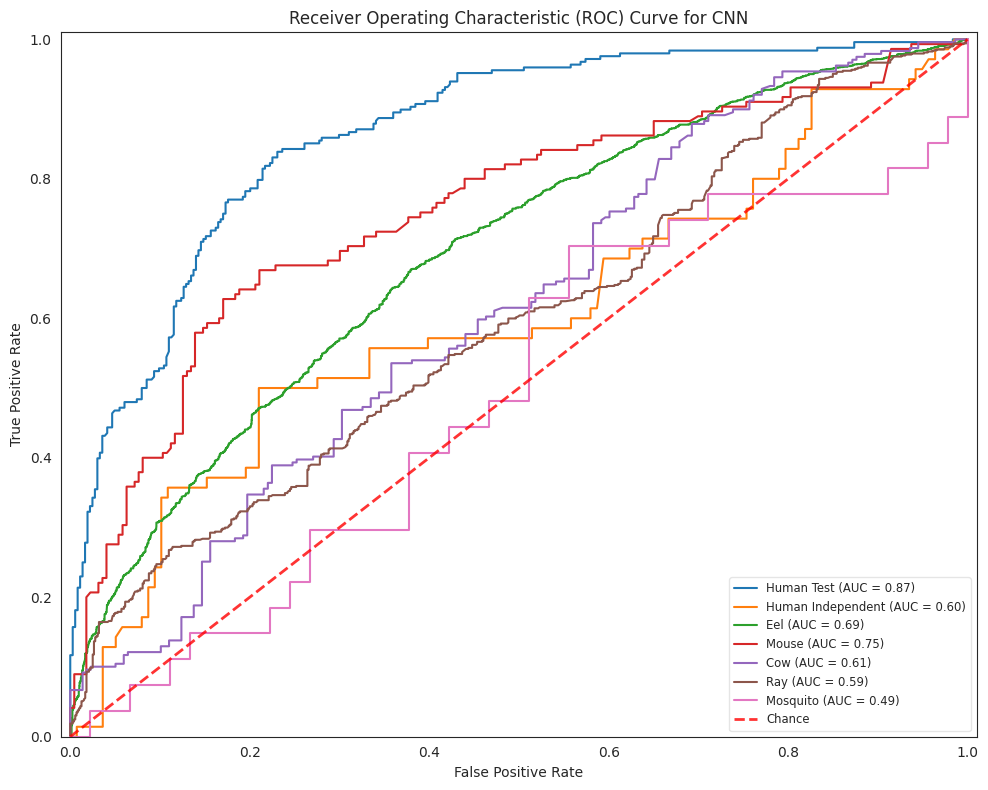

Evaluating dataset: Human Test
Evaluating model: LSTM
20/20 [==============================] - 0s 6ms/step
Confusion Matrix - LSTM:
[291  73]
[ 64 184]
Model: LSTM
Accuracy: 0.7761437908496732
Precision: 0.7159533073929961
Recall: 0.7419354838709677
F1 Score: 0.7287128712871287
ROC-AUC Score: 0.8239099610067352
Cohen's Kappa Score: 0.5382734541930083
MCC Score: 0.5385212456598756

Evaluating dataset: Human Independent
Evaluating model: LSTM
7/7 [==============================] - 0s 5ms/step
Confusion Matrix - LSTM:
[97 41]
[21 49]
Model: LSTM
Accuracy: 0.7019230769230769
Precision: 0.5444444444444444
Recall: 0.7
F1 Score: 0.6124999999999999
ROC-AUC Score: 0.7468426501035197
Cohen's Kappa Score: 0.3764023210831722
MCC Score: 0.3842571966349523

Evaluating dataset: Eel
Evaluating model: LSTM
171/171 [==============================] - 1s 4ms/step
Confusion Matrix - LSTM:
[2239 1136]
[1004 1080]
Model: LSTM
Accuracy: 0.6079868107712035
Precision: 0.48736462093862815
Recall: 0.5182341650671

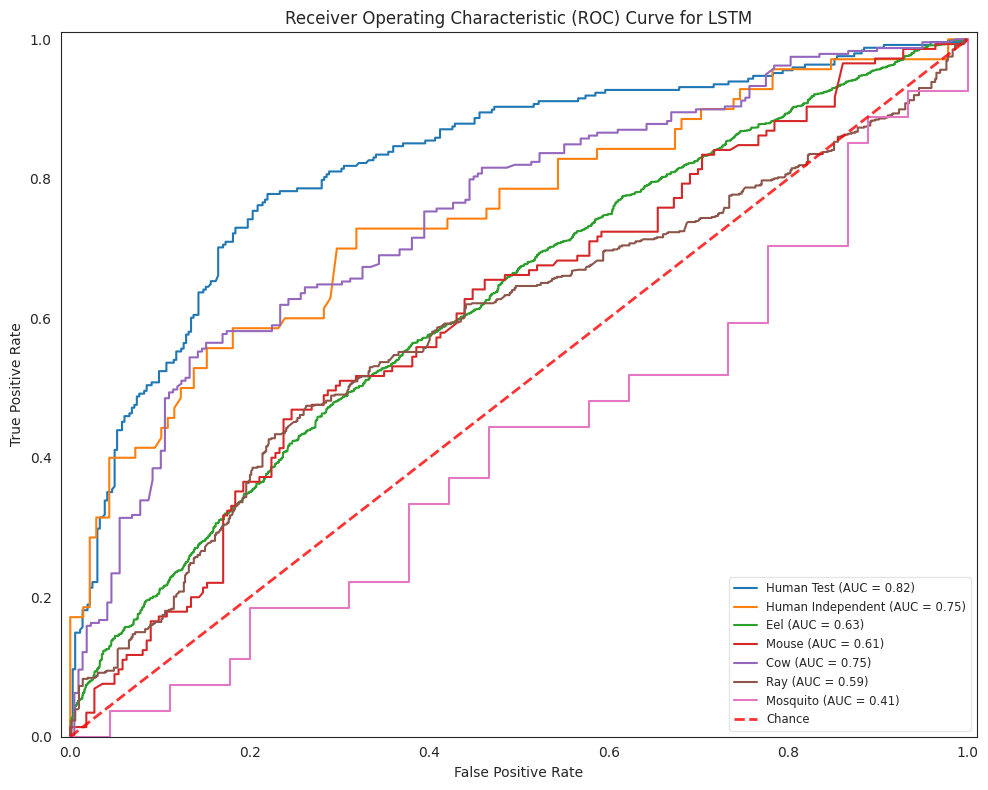

Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 0s 5ms/step
Confusion Matrix - GRU:
[273  91]
[ 47 201]
Model: GRU
Accuracy: 0.7745098039215687
Precision: 0.6883561643835616
Recall: 0.8104838709677419
F1 Score: 0.7444444444444444
ROC-AUC Score: 0.8278535980148884
Cohen's Kappa Score: 0.5450745496854261
MCC Score: 0.5509005890991757

Evaluating dataset: Human Independent
Evaluating model: GRU
7/7 [==============================] - 0s 5ms/step
Confusion Matrix - GRU:
[92 46]
[22 48]
Model: GRU
Accuracy: 0.6730769230769231
Precision: 0.5106382978723404
Recall: 0.6857142857142857
F1 Score: 0.5853658536585366
ROC-AUC Score: 0.7473084886128365
Cohen's Kappa Score: 0.3249331806032837
MCC Score: 0.33456818145019646

Evaluating dataset: Eel
Evaluating model: GRU
171/171 [==============================] - 1s 5ms/step
Confusion Matrix - GRU:
[2094 1281]
[ 950 1134]
Model: GRU
Accuracy: 0.5913170910423154
Precision: 0.46956521739130436
Recall: 0.544145

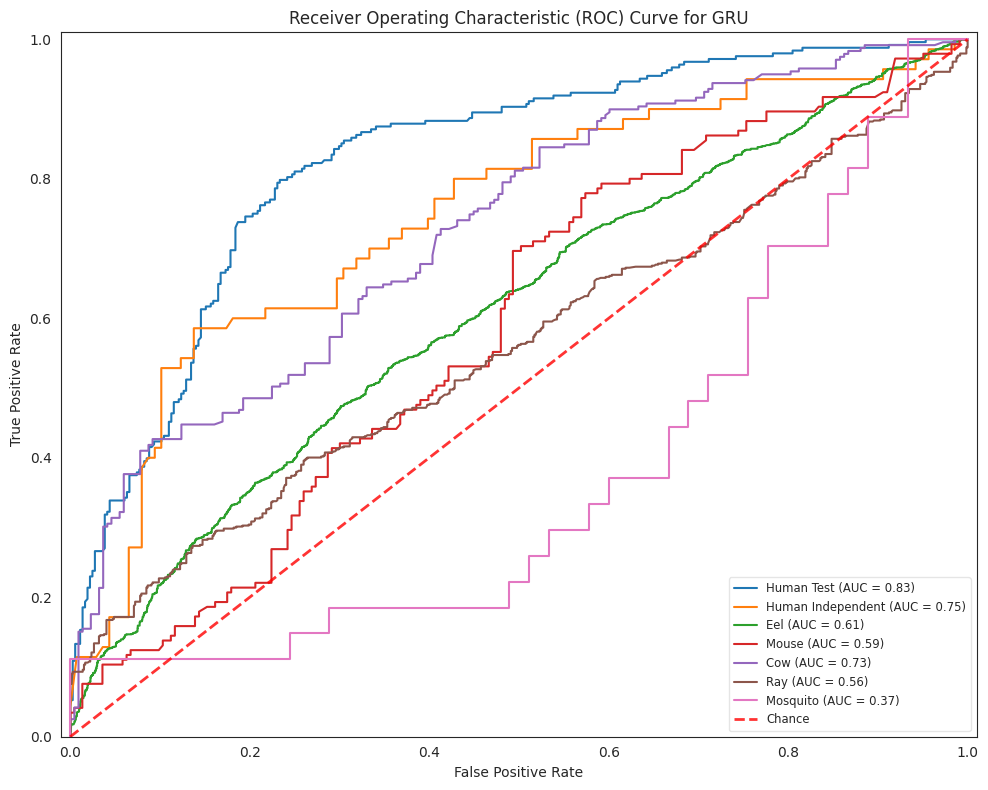

Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
20/20 [==============================] - 0s 8ms/step
Confusion Matrix - Bi-LSTM:
[272  92]
[ 56 192]
Model: Bi-LSTM
Accuracy: 0.7581699346405228
Precision: 0.676056338028169
Recall: 0.7741935483870968
F1 Score: 0.7218045112781956
ROC-AUC Score: 0.8334810350939383
Cohen's Kappa Score: 0.5096578605456907
MCC Score: 0.5133221763959483

Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
7/7 [==============================] - 0s 11ms/step
Confusion Matrix - Bi-LSTM:
[93 45]
[34 36]
Model: Bi-LSTM
Accuracy: 0.6201923076923077
Precision: 0.4444444444444444
Recall: 0.5142857142857142
F1 Score: 0.47682119205298007
ROC-AUC Score: 0.6125258799171843
Cohen's Kappa Score: 0.18118397448674506
MCC Score: 0.18237316945802454

Evaluating dataset: Eel
Evaluating model: Bi-LSTM
171/171 [==============================] - 1s 6ms/step
Confusion Matrix - Bi-LSTM:
[2151 1224]
[ 875 1209]
Model: Bi-LSTM
Accuracy: 0.6154973438358674
Precision

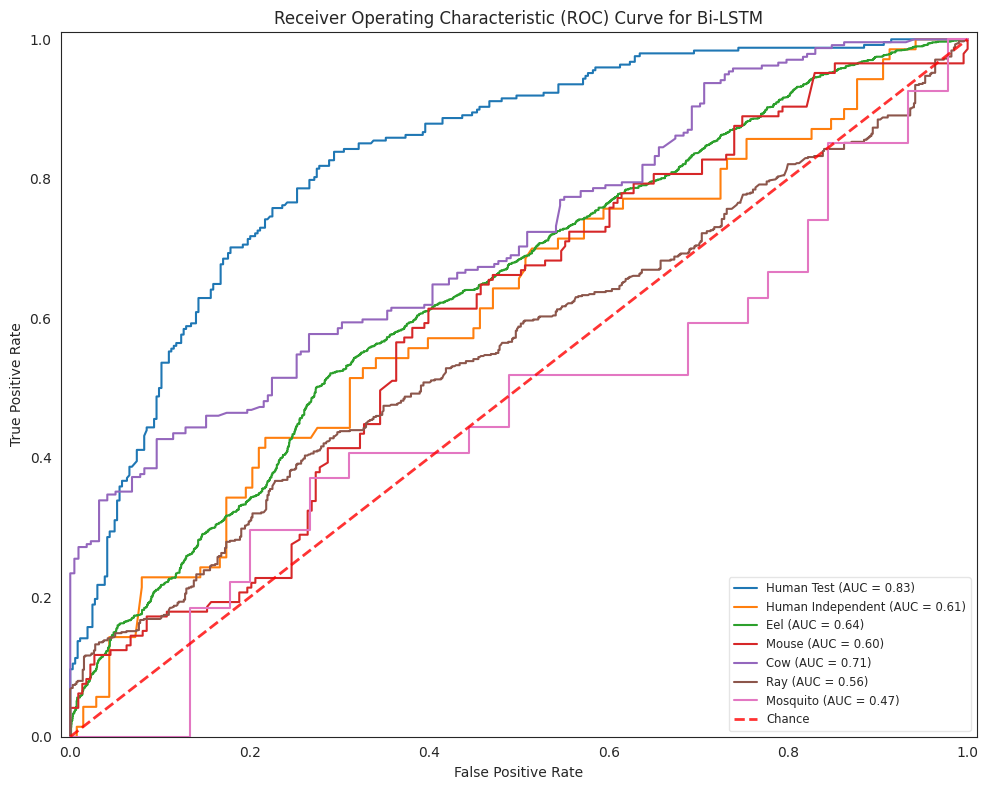

                                                                 ANN  \
Human Test         {'Accuracy': 0.8578431372549019, 'Precision': ...   
Human Independent  {'Accuracy': 0.6682692307692307, 'Precision': ...   
Eel                {'Accuracy': 0.7078219454112474, 'Precision': ...   
Mouse              {'Accuracy': 0.7907608695652174, 'Precision': ...   
Cow                {'Accuracy': 0.7067833698030634, 'Precision': ...   
Ray                {'Accuracy': 0.5803698435277382, 'Precision': ...   
Mosquito           {'Accuracy': 0.625, 'Precision': 0.5, 'Recall'...   

                                                                 CNN  \
Human Test         {'Accuracy': 0.7777777777777778, 'Precision': ...   
Human Independent  {'Accuracy': 0.6105769230769231, 'Precision': ...   
Eel                {'Accuracy': 0.6407766990291263, 'Precision': ...   
Mouse              {'Accuracy': 0.6711956521739131, 'Precision': ...   
Cow                {'Accuracy': 0.5689277899343544, 'Precision'

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

# Define a function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, model_name, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}


models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
all_results = {}
confusion_matrices = {}

for model_name in models.keys():
    plt.figure(figsize=(10, 8))

    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")
        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        model = models[model_name]
        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Calculate the confusion matrix
        confusion = confusion_matrix(y, y_pred)

        # Store confusion matrix
        confusion_matrices[(dataset_name, model_name)] = confusion

        # Print the confusion matrix as text
        print_confusion_matrix(confusion, model_name)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("ROC-AUC Score:", roc_auc)
        print("Cohen's Kappa Score:", cohen_kappa)
        print("MCC Score:", mcc)
        print()

        # Plot ROC-AUC curve
        plot_roc_auc(y, y_pred_prob[:, 1], model_name, dataset_name)

        # Store results
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right", fontsize='small', fancybox=True, framealpha=0.5)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'roc_auc_curve_{model_name}.png')
    plt.show()
    plt.close()

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)
print(results_df)

# Save results to Excel
results_df.to_excel('deep_learning_evaluation_results.xlsx', index=True)

# Save confusion matrices to a separate Excel file
with pd.ExcelWriter('confusion_matrices.xlsx') as writer:
    for (dataset_name, model_name), confusion_matrix in confusion_matrices.items():
        df_confusion = pd.DataFrame(confusion_matrix)
        df_confusion.to_excel(writer, sheet_name=f'{dataset_name}_{model_name}_confusion_matrix', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}


models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
    model_results = {}
    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Store results
        model_results[dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Create a Pandas DataFrame from the results
    results_df = pd.DataFrame(model_results)

    # Save results to Excel
    results_df.to_excel(f'{model_name}_evaluation_results.xlsx', index=True)


Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Evaluating dataset: Mouse
Evaluating model: ANN
12/12 [==============================] - 0s 2ms/step
Evaluating dataset: Cow
Evaluating model: ANN
15/15 [==============================] - 0s 2ms/step
Evaluating dataset: Ray
Evaluating model: ANN
44/44 [==============================] - 0s 2ms/step
Evaluating dataset: Mosquito
Evaluating model: ANN
3/3 [==============================] - 0s 3ms/step
Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 2ms/step
Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 2ms/step
Evaluating dataset: Eel
Evaluating model: CNN
171/171 [=========

## References

* Durant, J. L., Leland, B. A., Henry, D. R., & Nourse, J. G. (2002). Reoptimization of MDL Keys for Use in Drug Discovery. Journal of Chemical Information and Computer Sciences, 42(6), 1273–1280. https://doi.org/10.1021/ci010132r
* https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html
*Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283
* https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html